# Machine Learning in the Real World

##                1.Data preparation and cleaning

## Import Python Libraries

In [1]:
from utilities import *
# Change flag to True value if you want to run all the taking-time functions
flag = False

## Defining Data Paths And Variables

## Obtaining the Data Set

In [2]:
if flag:
    DataPreparation.obtainDataFromLocalDBs()

## Graphical representation on globus map

### For viewing map graphics, you should install 2 libraries:

#### 1. Install Basemap:
        · To install this package with conda run, type:
          conda install -c conda-forge basemap=1.0.8.dev0
        · download package and install from: http://matplotlib.org/basemap/
#### 2. Install GeonamesCache:
        · To install this package with conda run, type:
          conda install -c mbonix geonamescache=0.20
          pip install geonamescache
        · download package and install from: https://pypi.python.org/pypi/geonamescache
          look for version 0.20

## Images comparison method

### For images map comparison, you should install opencv library
        · To install this package with conda run, type:
        · conda install -c https://conda.binstar.org/menpo opencv
        · download package and install from: http://matplotlib.org/basemap/

## Reading the Working Dataset

In [2]:
overall_data = pd.read_csv(DataPreparation.retriveMergedFilePath(),\
                           header=0, index_col=0, skiprows=0, encoding='iso-8859-1')
overall_data.head(5)

country    year  \
0  Afghanistan  2012.0   
1  Afghanistan  2016.0   
2      Albania  2006.0   
3      Albania  2009.0   
4      Albania  2012.0   

   Adjusted net enrolment rate, lower secondary, both sexes (%)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                NaN              

   Adjusted net enrolment rate, lower secondary, female (%)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                                NaN          
4                                                NaN          

   Adjusted net enrolment rate, lower secondary, gender parity index (GPI)  \
0                                                NaN                         
1                                                NaN                         
2                                                NaN                         
3                                                NaN                         
4                                                NaN                         

   Adjusted net enrolment rate, lower secondary, male (%)  \
0                                                NaN        
1                                                NaN        
2                                                NaN        
3                                                NaN        
4                                                NaN        

   Adjusted net enrolment rate, primary, both sexes (%)  \
0                                                NaN      
1                                                NaN      
2                                                NaN      
3                                          89.393333      
4                                          96.137093      

   Adjusted net enrolment rate, primary, female (%)  \
0                                               NaN   
1                                               NaN   
2                                               NaN   
3                                         88.698219   
4                                         95.353287   

   Adjusted net enrolment rate, primary, gender parity index (GPI)  \
0                                                NaN                 
1                                                NaN                 
2                                                NaN                 
3                                            0.98508                 
4                                            0.98445                 

   Adjusted net enrolment rate, primary, male (%)         ...          \
0                                             NaN         ...           
1                                             NaN         ...           
2                                             NaN         ...           
3                                       90.041763         ...           
4                                       96.859650         ...           

   Wittgenstein Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total  \
0                                                NaN                                                                     
1                                                NaN                                                                     
2                                                NaN                                                                     
3                                                NaN                                                                     
4                                                NaN                        

## Nations tuples count- maybe we will remove some countries before running model

In [3]:
overall_data['country'].value_counts()[:10]

France            40
United Kingdom    40
Germany           40
Finland           40
Spain             40
Sweden            40
Japan             40
Netherlands       40
Italy             40
Mexico            40
Name: country, dtype: int64

## Years tuples histogram- maybe we will remove some years before running model

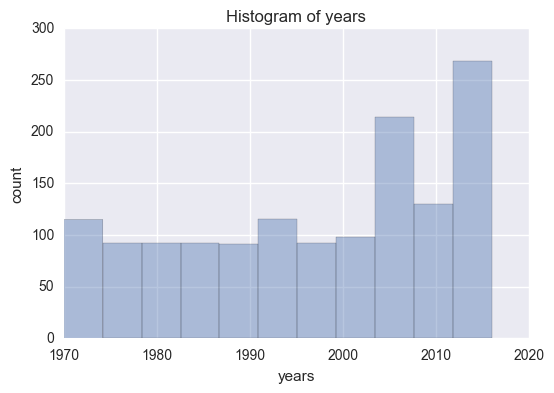

In [4]:
%matplotlib inline
sns.distplot(overall_data['year'], kde = False)
plt.title('Histogram of years')
plt.xlabel('years')
plt.ylabel('count')
plt.show()

### Histogram of Happy Planet Index values

C:\Users\Avi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


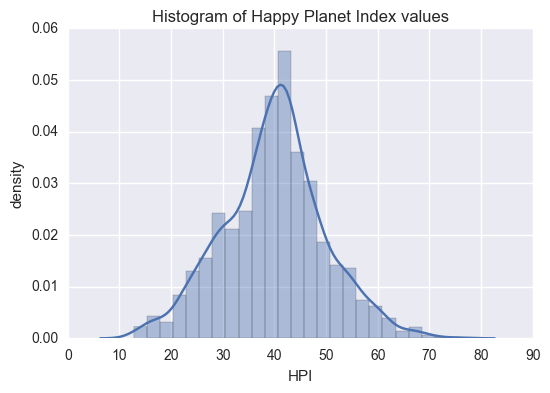

In [5]:
%matplotlib inline
sns.distplot(overall_data['Happy Planet Index'], bins = 25, kde = True)
plt.title('Histogram of Happy Planet Index values')
plt.xlabel('HPI')
plt.ylabel('density')
plt.show()

## Drop columns and rows with %(nulls)>80%

In [3]:
THRESH = 0.2
overall_data = overall_data.dropna(1, thresh=(overall_data.shape[0] * (1 - THRESH)))
overall_data = overall_data.dropna(0, thresh=(overall_data.shape[1] * (1 - THRESH)))
overall_data.head(5)

country    year  Enrolment in primary education, both sexes (number)  \
0  Afghanistan  2012.0                                          5767543.0     
2      Albania  2006.0                                           222402.0     
3      Albania  2009.0                                           236102.0     
4      Albania  2012.0                                           206617.0     
6      Algeria  2006.0                                          4196580.0     

   Enrolment in primary education, female (number)  \
0                                        2348306.0   
2                                         107004.0   
3                                         112399.0   
4                                          97583.0   
6                                        1973901.0   

   GDP at market prices (constant 2005 US$)  \
0                              1.935220e+10   
2                              9.771760e+09   
3                              1.150029e+10   
4                              1.240477e+10   
6                              1.446470e+11   

   GDP at market prices (current US$)  GDP per capita (constant 2005 US$)  \
0                        2.053654e+10                          651.001852   
2                        8.992642e+09                         3265.365622   
3                        1.204421e+10                         3928.340828   
4                        1.231978e+10                         4277.143310   
6                        1.170270e+11                         4285.934521   

   GDP per capita (current US$)  GNI (current US$)  \
0                    690.842629       2.157185e+10   
2                   3005.012903       9.254605e+09   
3                   4114.136545       1.185274e+10   
4                   4247.839852       1.222802e+10   
6                   3467.544740       1.126050e+11   

   GNI per capita, Atlas method (current US$)         ...          \
0                                       720.0         ...           
2                                      3090.0         ...           
3                                      4280.0         ...           
4                                      4360.0         ...           
6                                      3100.0         ...           

   Population, male (% of total)  Population, total  \
0                      51.435962         29726803.0   
2                      50.260019          2992547.0   
3                      50.432577          2927519.0   
4                      50.128703          2900247.0   
6                      50.489699         33749328.0   

   School life expectancy, primary, both sexes (years)  \
0                                            6.53571     
2                                            3.98375     
3                                            4.80613     
4                                            5.16259     
6                                            6.40438     

   School life expectancy, primary, female (years)  \
0                                          5.47000   
2                                          3.97433   
3                                          4.74382   
4                                          5.09023   
6                                          6.17532   

   School life expectancy, primary, gender parity index (GPI)  \
0                                            0.72495            
2                                            0.99544            
3                                            0.97524            
4                                            0.97326            
6                                            0.93223            

   School life expectancy, primary, male (years)  \
0                                        7.54532   
2                                        3.99253   
3                                        4.86425   
4                                        5.23009   
6                                        6.62422   

   Theoretic

## Find Most Corrolated features

In [7]:
HPI_correlation = overall_data[overall_data.columns[1:-1]].apply\
(lambda x: x.corr(overall_data['Happy Planet Index'], method='spearman'))
HPI_correlation = HPI_correlation.abs().sort_values(ascending=False)
HPI_correlation = pd.DataFrame({'Feature':HPI_correlation.index,\
                                'Correlation to Happy Planet Index':HPI_correlation.values})
HPI_correlation.head(6)

Correlation to Happy Planet Index  \
0                           0.244313   
1                           0.242787   
2                           0.242299   
3                           0.241668   
4                           0.241227   
5                           0.239556   

                                             Feature  
0                     Population, ages 15-64, female  
1  Population of the official age for pre-primary...  
2  Population of the official age for pre-primary...  
3  Population of the official age for pre-primary...  
4                      Population, ages 15-64, total  
5                       Population, ages 15-64, male

## Plot Corrolation matrix- taken 2 positive and 2 negative corrolated features

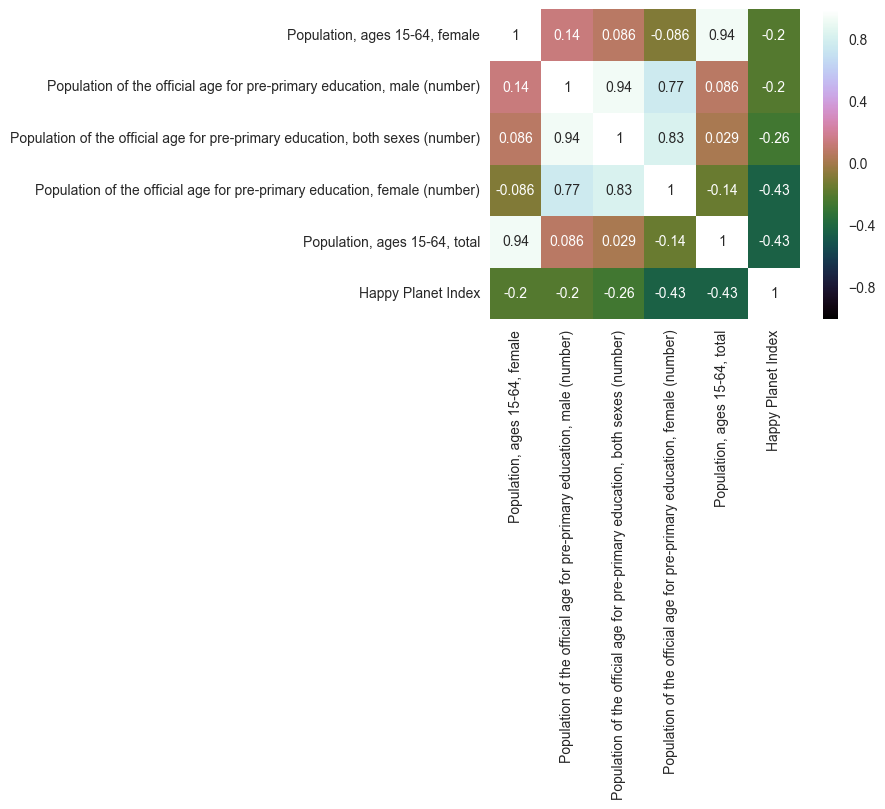

In [8]:
corr_features = HPI_correlation['Feature'].head(5).tolist() + ['Happy Planet Index']
corr_features = [x for x in corr_features if x != 'year']
overall_data_to_plot = overall_data[corr_features]
data_corr_mat= overall_data_to_plot.corr(method='spearman')
c = data_corr_mat.corr(method='spearman')
sns.heatmap(c, vmax=1, square=True, annot=True, cmap='cubehelix')

# Plotting Data on world map

In [10]:
# initialize list containing images' paths for concatination
countries_corrs = []

## Plotting the Happy Planet Index over the globe

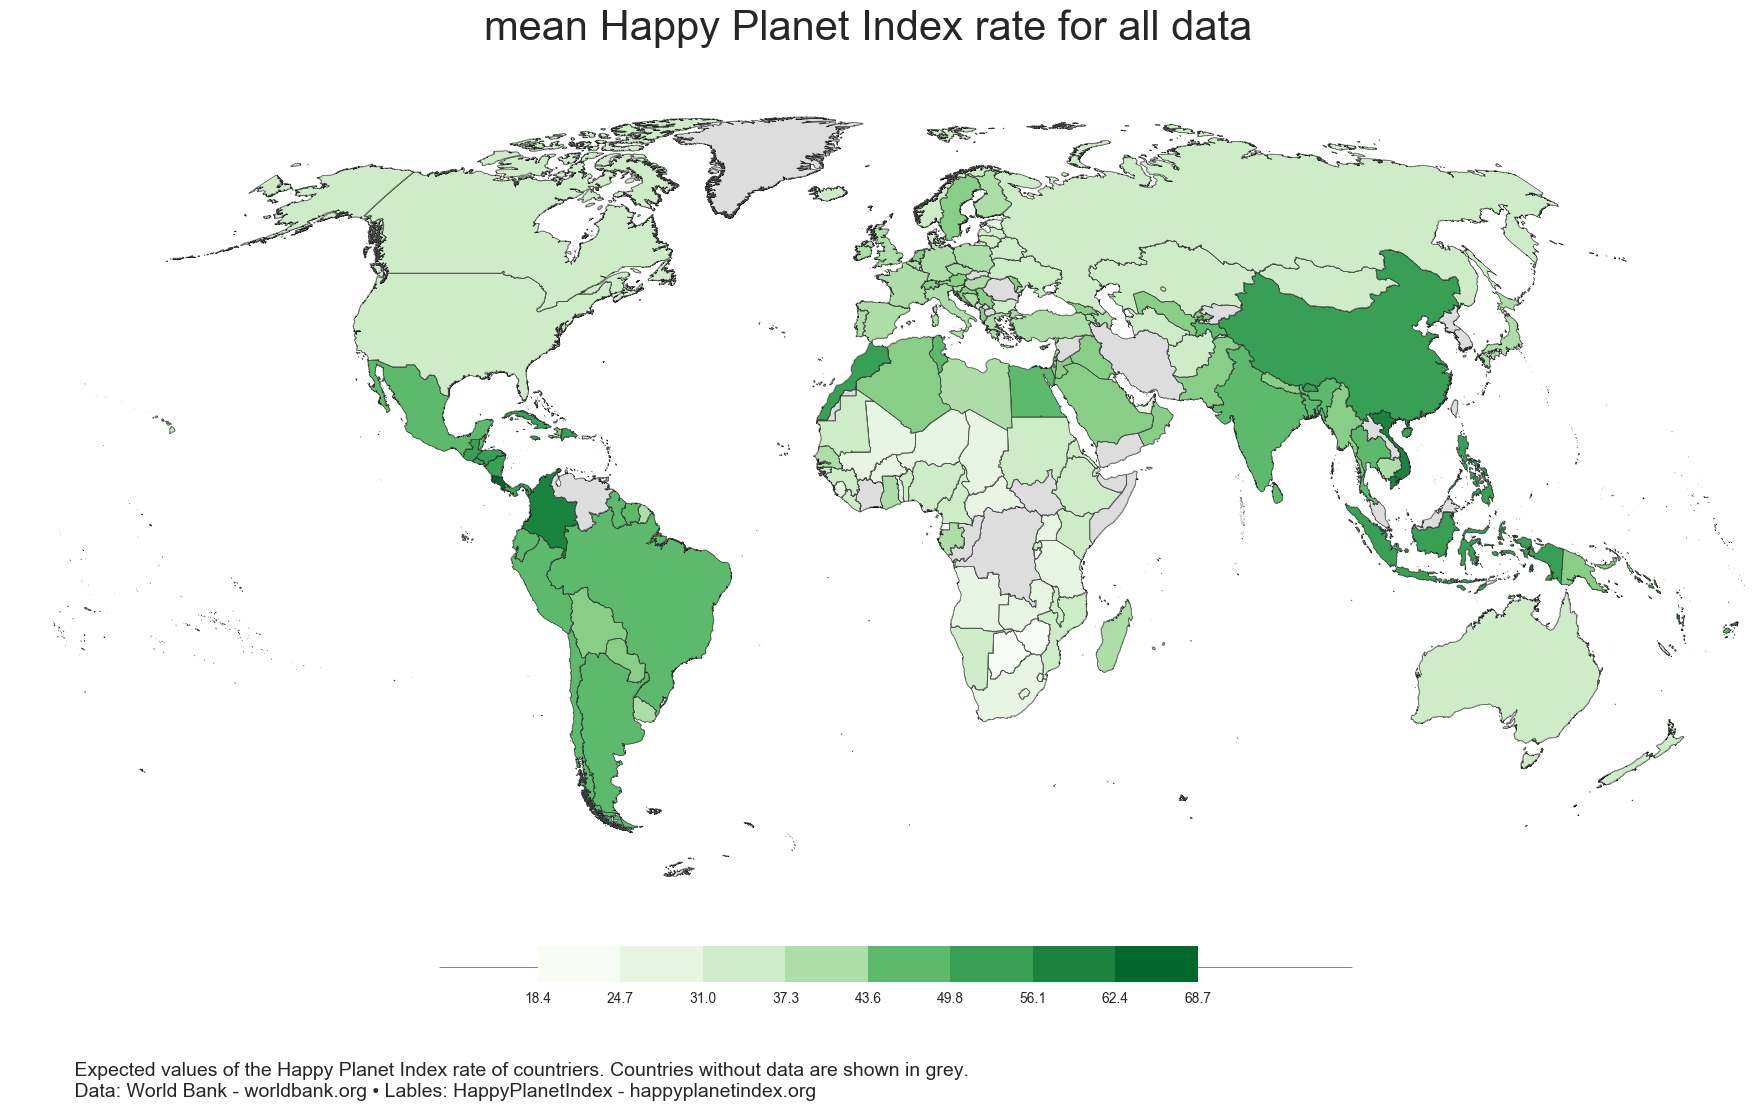

In [11]:
MapVisualizations.plotDataOnMap(overall_data, feature='Happy Planet Index', year='mean')

## Plotting the $1^{st}$ correlated feature over the globe

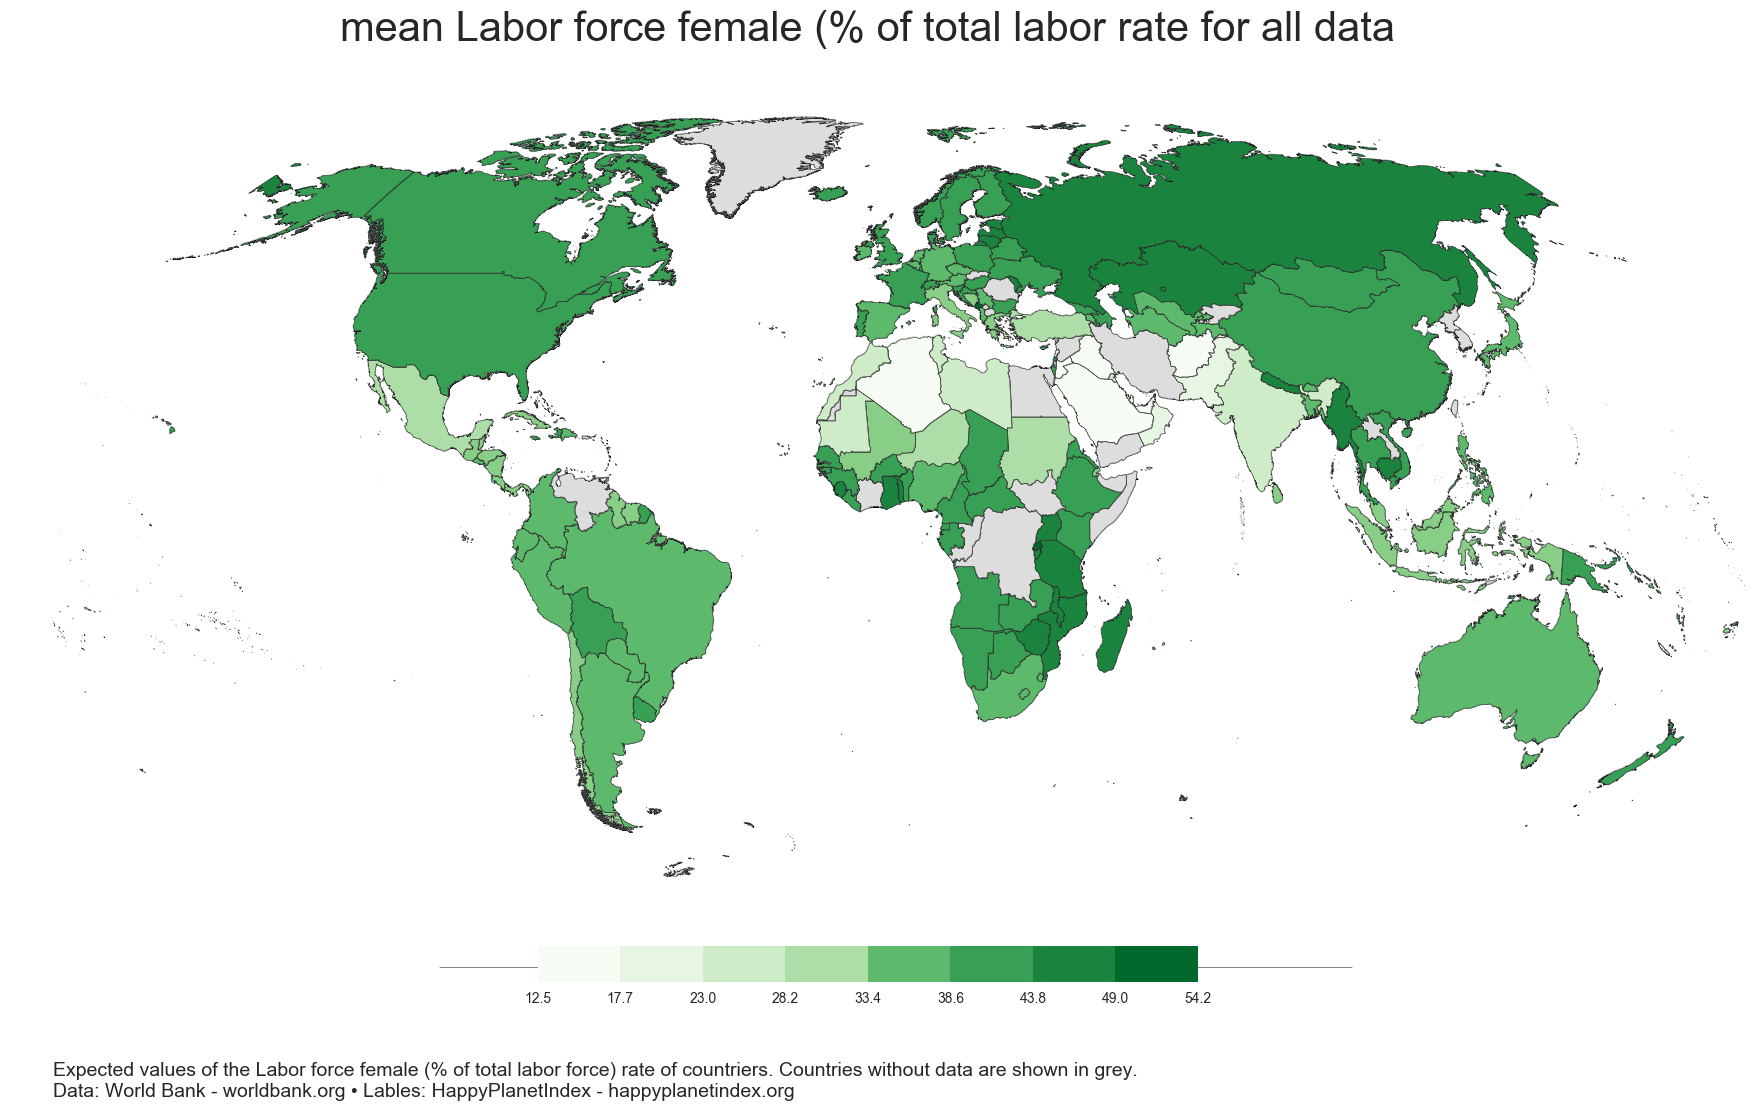

In [174]:
MapVisualizations.plotDataOnMap(overall_data, feature=corr_features[0], year='mean')

### Which Countries doesn't corrolate in the above feature and target

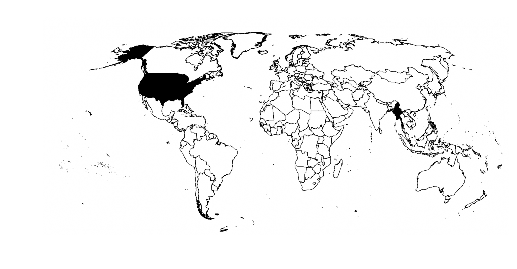

In [56]:
feature_image = globe_plots + 'Happy Planet Index_mean.png'
target_image = globe_plots + corr_features[0] +'_mean.png'
output_image = uncorrolated_plots + corr_features[0] + '.png'
countries_corrs.append(output_image)
MapVisualizations. plotUncorrolatedCountries(feature_image, target_image, output_image)

## Plotting the $2^{nd}$ correlated feature over the globe

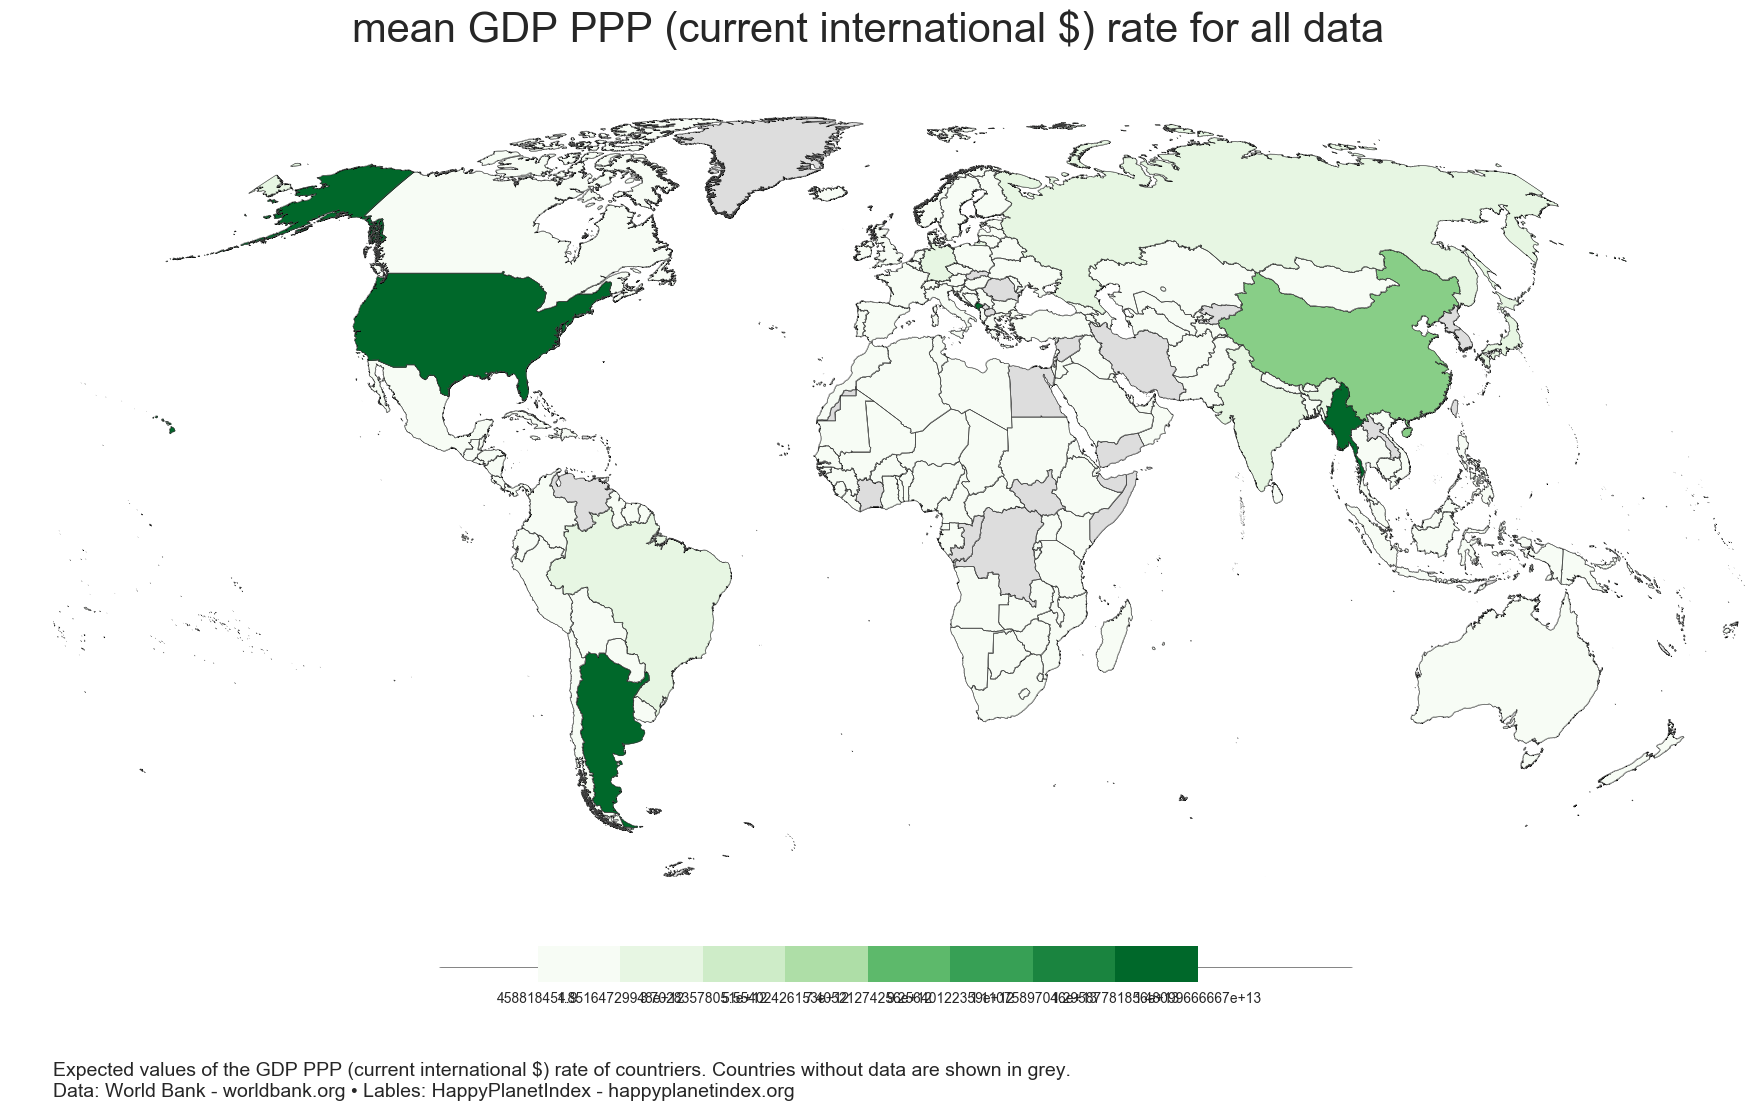

In [22]:
MapVisualizations.plotDataOnMap(overall_data, feature=corr_features[1], year='mean')

### Which Countries doesn't corrolate in the above feature and target

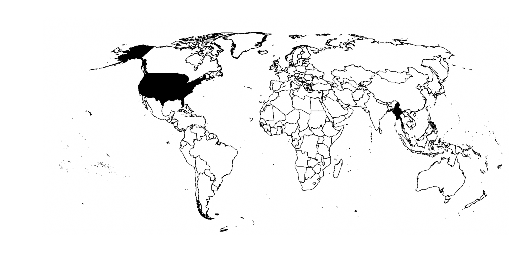

In [202]:
feature_image = globe_plots + 'Happy Planet Index_mean.png'
target_image = globe_plots + corr_features[1] +'_mean.png'
output_image = uncorrolated_plots + corr_features[1] +'.png'
countries_corrs.append(output_image)
MapVisualizations.plotUncorrolatedCountries(feature_image, target_image, output_image)

## Plotting the $3^{rd}$ correlated feature over the globe

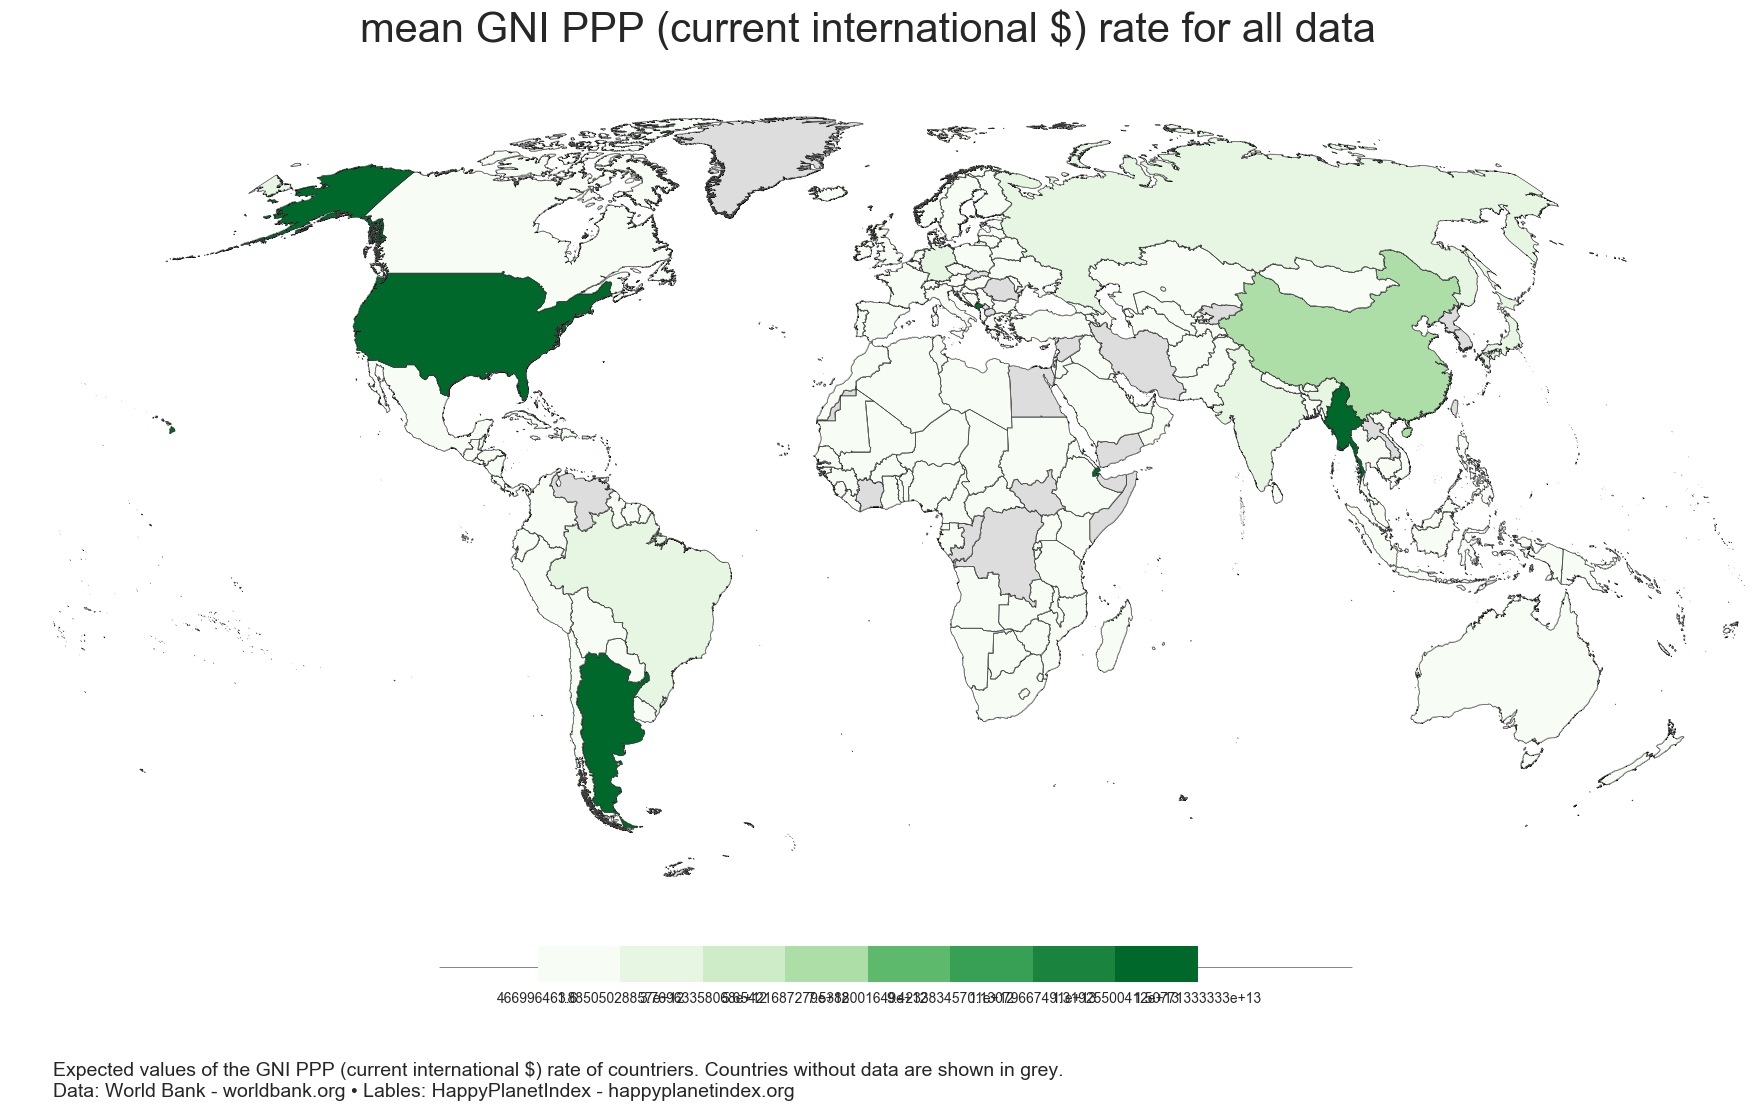

In [24]:
MapVisualizations.plotDataOnMap(overall_data, feature=corr_features[2], year='mean')

### Which Countries doesn't corrolate in the above feature and target

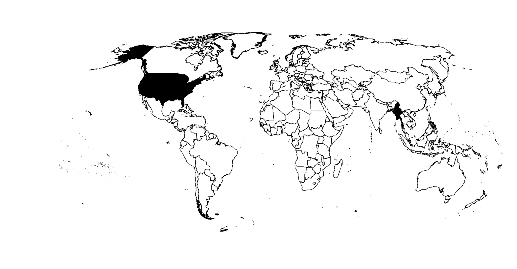

In [203]:
feature_image = globe_plots + 'Happy Planet Index_mean.png'
target_image = globe_plots + corr_features[2] + '_mean.png'
output_image = uncorrolated_plots + corr_features[2] + '.png'
countries_corrs.append(output_image)
MapVisualizations.plotUncorrolatedCountries(feature_image, target_image, output_image)

## Plotting the $4^{th}$ correlated feature over the globe

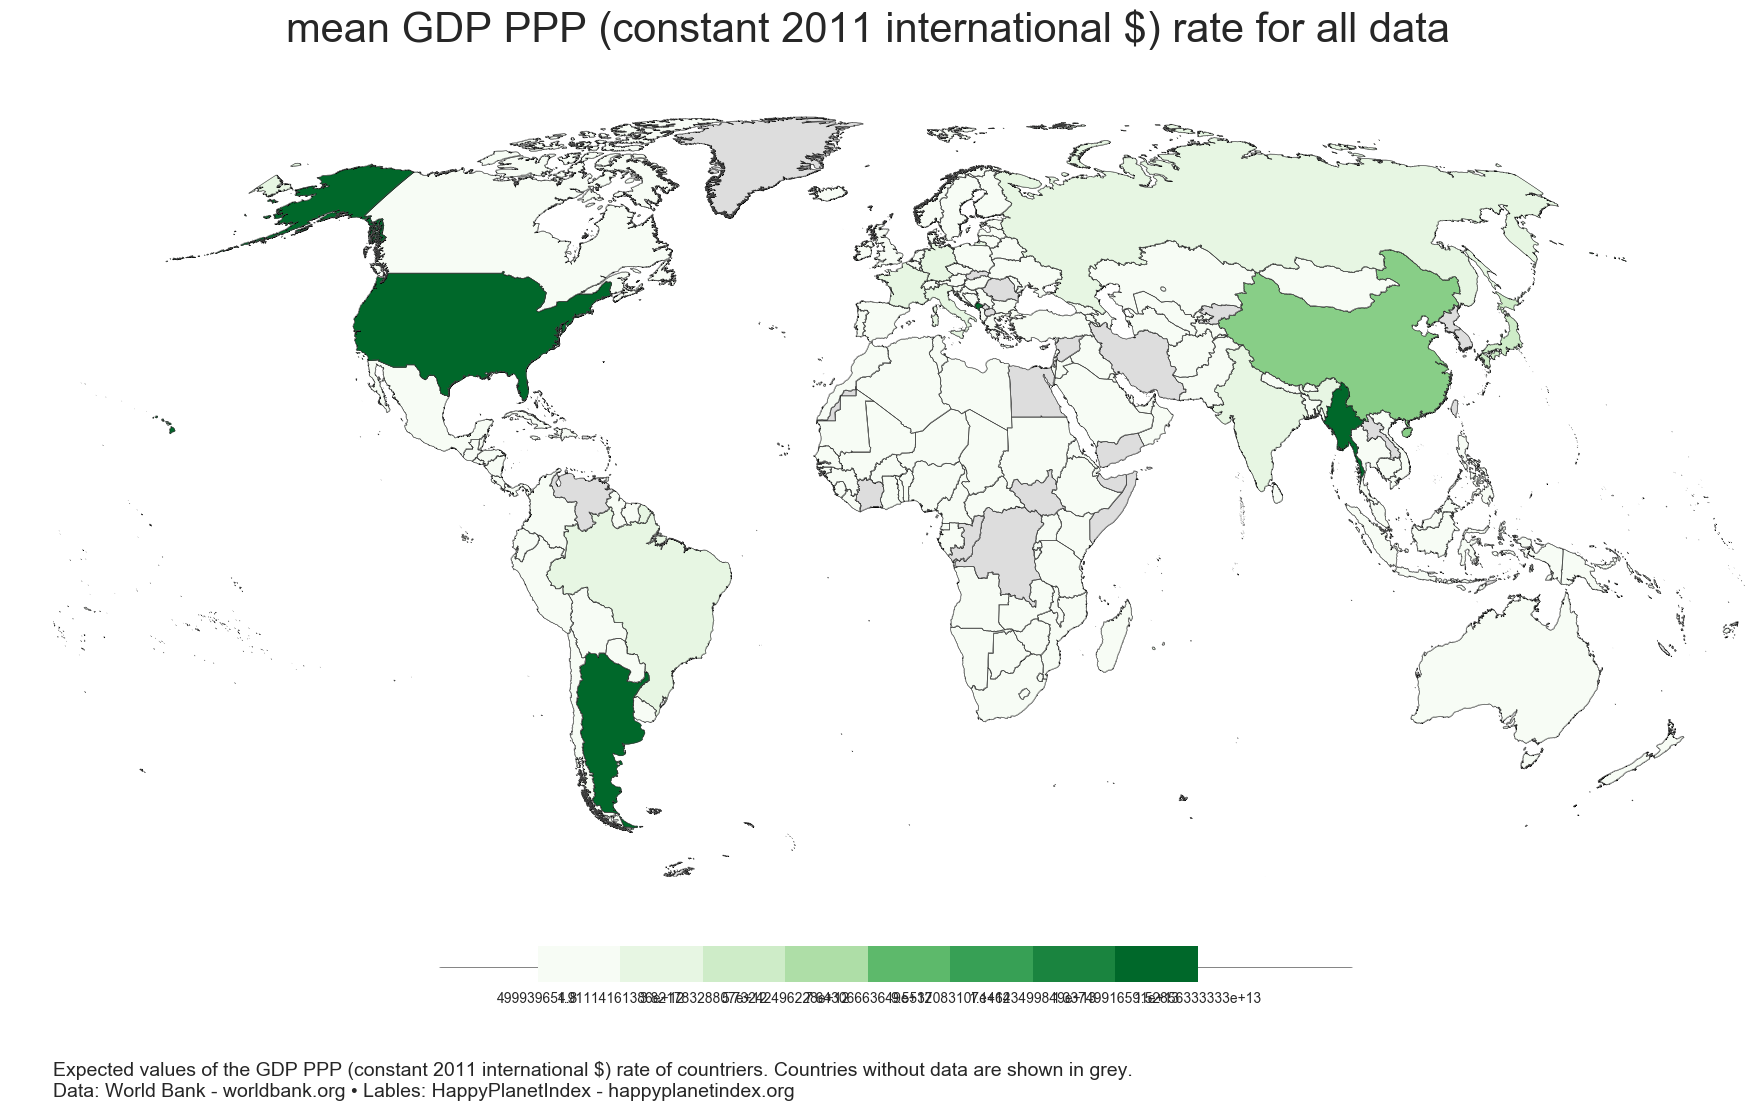

In [26]:
MapVisualizations.plotDataOnMap(overall_data, feature=corr_features[3], year='mean')

### Which Countries doesn't corrolate in the above feature and target

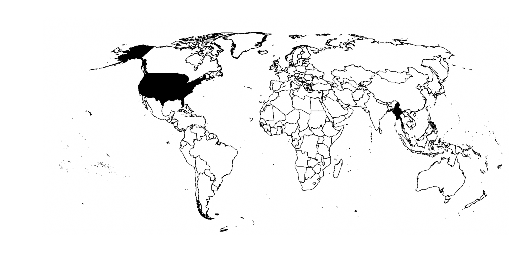

In [204]:
feature_image = os.path.join(globe_plots, 'Happy Planet Index_mean.png')
target_image = os.path.join(globe_plots, corr_features[3] + '_mean.png')
output_image = os.path.join(uncorrolated_plots, corr_features[3] + '.png')
countries_corrs.append(output_image)
MapVisualizations.plotUncorrolatedCountries(feature_image, target_image, output_image)

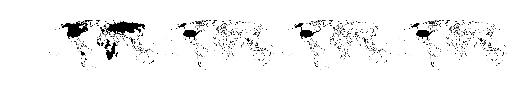

(<matplotlib.image.AxesImage at 0x1fa6dbfaba8>, None)

In [205]:
out = ImagesUtils.concat_n_images(countries_corrs)
plt.axis('off')
plt.imshow(out, cmap = 'gray', interpolation = 'bicubic'),plt.show()

### Impute nulls with medians

In [4]:
overall_data = overall_data.fillna(overall_data.median())
overall_data.head(5)

country    year  Enrolment in primary education, both sexes (number)  \
0  Afghanistan  2012.0                                          5767543.0     
2      Albania  2006.0                                           222402.0     
3      Albania  2009.0                                           236102.0     
4      Albania  2012.0                                           206617.0     
6      Algeria  2006.0                                          4196580.0     

   Enrolment in primary education, female (number)  \
0                                        2348306.0   
2                                         107004.0   
3                                         112399.0   
4                                          97583.0   
6                                        1973901.0   

   GDP at market prices (constant 2005 US$)  \
0                              1.935220e+10   
2                              9.771760e+09   
3                              1.150029e+10   
4                              1.240477e+10   
6                              1.446470e+11   

   GDP at market prices (current US$)  GDP per capita (constant 2005 US$)  \
0                        2.053654e+10                          651.001852   
2                        8.992642e+09                         3265.365622   
3                        1.204421e+10                         3928.340828   
4                        1.231978e+10                         4277.143310   
6                        1.170270e+11                         4285.934521   

   GDP per capita (current US$)  GNI (current US$)  \
0                    690.842629       2.157185e+10   
2                   3005.012903       9.254605e+09   
3                   4114.136545       1.185274e+10   
4                   4247.839852       1.222802e+10   
6                   3467.544740       1.126050e+11   

   GNI per capita, Atlas method (current US$)         ...          \
0                                       720.0         ...           
2                                      3090.0         ...           
3                                      4280.0         ...           
4                                      4360.0         ...           
6                                      3100.0         ...           

   Population, male (% of total)  Population, total  \
0                      51.435962         29726803.0   
2                      50.260019          2992547.0   
3                      50.432577          2927519.0   
4                      50.128703          2900247.0   
6                      50.489699         33749328.0   

   School life expectancy, primary, both sexes (years)  \
0                                            6.53571     
2                                            3.98375     
3                                            4.80613     
4                                            5.16259     
6                                            6.40438     

   School life expectancy, primary, female (years)  \
0                                          5.47000   
2                                          3.97433   
3                                          4.74382   
4                                          5.09023   
6                                          6.17532   

   School life expectancy, primary, gender parity index (GPI)  \
0                                            0.72495            
2                                            0.99544            
3                                            0.97524            
4                                            0.97326            
6                                            0.93223            

   School life expectancy, primary, male (years)  \
0                                        7.54532   
2                                        3.99253   
3                                        4.86425   
4                                        5.23009   
6                                        6.62422   

   Theoretic

## One Hot Encoding Foreach Country

In [5]:
overall_data_countries = overall_data['country']
oh_overall_data = overall_data.drop('country', axis=1)
onehot_overall_col = pd.get_dummies(overall_data['country'], prefix='country')

#check for missing cols in onehot_overall_col
for col in onehot_overall_col.columns:
    if col not in onehot_overall_col.columns:
        onehot_overall_col[col] = 0
        
oh_overall_data = pd.concat([oh_overall_data, onehot_overall_col], axis=1)
overall_data = oh_overall_data
overall_data['country'] = overall_data_countries
overall_data.head(5)

year  Enrolment in primary education, both sexes (number)  \
0  2012.0                                          5767543.0     
2  2006.0                                           222402.0     
3  2009.0                                           236102.0     
4  2012.0                                           206617.0     
6  2006.0                                          4196580.0     

   Enrolment in primary education, female (number)  \
0                                        2348306.0   
2                                         107004.0   
3                                         112399.0   
4                                          97583.0   
6                                        1973901.0   

   GDP at market prices (constant 2005 US$)  \
0                              1.935220e+10   
2                              9.771760e+09   
3                              1.150029e+10   
4                              1.240477e+10   
6                              1.446470e+11   

   GDP at market prices (current US$)  GDP per capita (constant 2005 US$)  \
0                        2.053654e+10                          651.001852   
2                        8.992642e+09                         3265.365622   
3                        1.204421e+10                         3928.340828   
4                        1.231978e+10                         4277.143310   
6                        1.170270e+11                         4285.934521   

   GDP per capita (current US$)  GNI (current US$)  \
0                    690.842629       2.157185e+10   
2                   3005.012903       9.254605e+09   
3                   4114.136545       1.185274e+10   
4                   4247.839852       1.222802e+10   
6                   3467.544740       1.126050e+11   

   GNI per capita, Atlas method (current US$)  \
0                                       720.0   
2                                      3090.0   
3                                      4280.0   
4                                      4360.0   
6                                      3100.0   

   Gross enrolment ratio, primary, both sexes (%)     ...       \
0                                      108.928520     ...        
2                                       99.593842     ...        
3                                       97.525330     ...        
4                                      104.784393     ...        
6                                      108.287209     ...        

   country_United Arab Emirates  country_United Kingdom  \
0                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   
6                             0                       0   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      0                0                   0   
6                      0                0                   0   

   country_Vanuatu  country_Vietnam  country_Zambia  country_Zimbabwe  \
0                0                0               0                 0   
2                0                0               0                 0   
3                0                0               0                 0   
4                0                0               0                 0   
6                0                0               0                 0   

       country  
0  Afghanistan  
2      Albania  
3      Albania  
4      Albania  
6      Algeria  

[5 rows x 224 columns]

## Split Data into training set and test set

In [6]:
train_data, test_data = train_test_split\
(overall_data, test_size = 0.2, random_state=0)
train_data.reset_index(drop=True, inplace=True)
test_data.reset_index(drop=True, inplace=True)
train_data.head(5)

year  Enrolment in primary education, both sexes (number)  \
0  2009.0                                           406920.0     
1  1985.0                                           420665.0     
2  1984.0                                           888440.0     
3  1991.0                                          2820497.0     
4  2006.0                                           364263.0     

   Enrolment in primary education, female (number)  \
0                                         200909.0   
1                                         205210.0   
2                                         430238.0   
3                                        1366826.0   
4                                         161875.0   

   GDP at market prices (constant 2005 US$)  \
0                              1.063964e+10   
1                              6.420870e+10   
2                              1.813080e+11   
3                              8.954290e+11   
4                              2.179437e+09   

   GDP at market prices (current US$)  GDP per capita (constant 2005 US$)  \
0                        8.876191e+09                         4943.249801   
1                        2.129391e+10                        18147.884040   
2                        4.802002e+10                        18321.674990   
3                        5.755990e+11                        22995.652240   
4                        1.211162e+09                          506.323083   

   GDP per capita (current US$)  GNI (current US$)  \
0                   4123.939997       8.708821e+09   
1                   6018.489552       1.983712e+10   
2                   4852.565728       4.851687e+10   
3                  14782.038900       5.713820e+11   
4                    281.375017       1.202459e+09   

   GNI per capita, Atlas method (current US$)  \
0                                      4120.0   
1                                      5630.0   
2                                      5130.0   
3                                     13720.0   
4                                       280.0   

   Gross enrolment ratio, primary, both sexes (%)   ...     \
0                                      108.228012   ...      
1                                       95.102722   ...      
2                                      105.983048   ...      
3                                      105.279709   ...      
4                                       68.011917   ...      

   country_United Arab Emirates  country_United Kingdom  \
0                             0                       0   
1                             0                       0   
2                             0                       0   
3                             0                       0   
4                             0                       0   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      0                0                   0   

   country_Vanuatu  country_Vietnam  country_Zambia  country_Zimbabwe  country  
0                0                0               0                 0  Namibia  
1                0                0               0                 0  Ireland  
2                0                0               0                 0   Greece  
3                0                0               0                 0    Spain  
4                0                0               0                 0  Eritrea  

[5 rows x 224 columns]

### Partition factors, class and countries

In [7]:
train_countries = train_data['country']
train_class = train_data['Happy Planet Index']
train_factors = (train_data.drop(['Happy Planet Index', 'country'], axis=1))

test_countries = test_data['country']
test_class = test_data['Happy Planet Index']
test_factors =(test_data.drop(['Happy Planet Index', 'country'], axis=1))
train_factors.head(5)

year  Enrolment in primary education, both sexes (number)  \
0  2009.0                                           406920.0     
1  1985.0                                           420665.0     
2  1984.0                                           888440.0     
3  1991.0                                          2820497.0     
4  2006.0                                           364263.0     

   Enrolment in primary education, female (number)  \
0                                         200909.0   
1                                         205210.0   
2                                         430238.0   
3                                        1366826.0   
4                                         161875.0   

   GDP at market prices (constant 2005 US$)  \
0                              1.063964e+10   
1                              6.420870e+10   
2                              1.813080e+11   
3                              8.954290e+11   
4                              2.179437e+09   

   GDP at market prices (current US$)  GDP per capita (constant 2005 US$)  \
0                        8.876191e+09                         4943.249801   
1                        2.129391e+10                        18147.884040   
2                        4.802002e+10                        18321.674990   
3                        5.755990e+11                        22995.652240   
4                        1.211162e+09                          506.323083   

   GDP per capita (current US$)  GNI (current US$)  \
0                   4123.939997       8.708821e+09   
1                   6018.489552       1.983712e+10   
2                   4852.565728       4.851687e+10   
3                  14782.038900       5.713820e+11   
4                    281.375017       1.202459e+09   

   GNI per capita, Atlas method (current US$)  \
0                                      4120.0   
1                                      5630.0   
2                                      5130.0   
3                                     13720.0   
4                                       280.0   

   Gross enrolment ratio, primary, both sexes (%)        ...         \
0                                      108.228012        ...          
1                                       95.102722        ...          
2                                      105.983048        ...          
3                                      105.279709        ...          
4                                       68.011917        ...          

   country_Ukraine  country_United Arab Emirates  country_United Kingdom  \
0                0                             0                       0   
1                0                             0                       0   
2                0                             0                       0   
3                0                             0                       0   
4                0                             0                       0   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      0                0                   0   

   country_Vanuatu  country_Vietnam  country_Zambia  country_Zimbabwe  
0                0                0               0                 0  
1                0                0               0                 0  
2                0                0               0                 0  
3                0                0               0                 0  
4                0                0               0                 0  

[5 rows x 222 columns]

## Binning The Years by Decades

In [8]:
min_year = min(min(train_factors['year']), min(test_factors['year']))

train_factors['year'] = train_factors['year'].apply(lambda x:math.floor((x-min_year) / 10))
test_factors['year'] = test_factors['year'].apply(lambda x:math.floor((x-min_year) / 10))

train_factors.head(5)

year  Enrolment in primary education, both sexes (number)  \
0     3                                           406920.0     
1     1                                           420665.0     
2     1                                           888440.0     
3     2                                          2820497.0     
4     3                                           364263.0     

   Enrolment in primary education, female (number)  \
0                                         200909.0   
1                                         205210.0   
2                                         430238.0   
3                                        1366826.0   
4                                         161875.0   

   GDP at market prices (constant 2005 US$)  \
0                              1.063964e+10   
1                              6.420870e+10   
2                              1.813080e+11   
3                              8.954290e+11   
4                              2.179437e+09   

   GDP at market prices (current US$)  GDP per capita (constant 2005 US$)  \
0                        8.876191e+09                         4943.249801   
1                        2.129391e+10                        18147.884040   
2                        4.802002e+10                        18321.674990   
3                        5.755990e+11                        22995.652240   
4                        1.211162e+09                          506.323083   

   GDP per capita (current US$)  GNI (current US$)  \
0                   4123.939997       8.708821e+09   
1                   6018.489552       1.983712e+10   
2                   4852.565728       4.851687e+10   
3                  14782.038900       5.713820e+11   
4                    281.375017       1.202459e+09   

   GNI per capita, Atlas method (current US$)  \
0                                      4120.0   
1                                      5630.0   
2                                      5130.0   
3                                     13720.0   
4                                       280.0   

   Gross enrolment ratio, primary, both sexes (%)        ...         \
0                                      108.228012        ...          
1                                       95.102722        ...          
2                                      105.983048        ...          
3                                      105.279709        ...          
4                                       68.011917        ...          

   country_Ukraine  country_United Arab Emirates  country_United Kingdom  \
0                0                             0                       0   
1                0                             0                       0   
2                0                             0                       0   
3                0                             0                       0   
4                0                             0                       0   

   country_United States  country_Uruguay  country_Uzbekistan  \
0                      0                0                   0   
1                      0                0                   0   
2                      0                0                   0   
3                      0                0                   0   
4                      0                0                   0   

   country_Vanuatu  country_Vietnam  country_Zambia  country_Zimbabwe  
0                0                0               0                 0  
1                0                0               0                 0  
2                0                0               0                 0  
3                0                0               0                 0  
4                0                0               0                 0  

[5 rows x 222 columns]

### Change all numeric values' datatypes to float

In [9]:
train_factors = train_factors.astype(np.float)
test_factors = test_factors.astype(np.float)
train_factors.dtypes[:5]

year                                                   float64
Enrolment in primary education, both sexes (number)    float64
Enrolment in primary education, female (number)        float64
GDP at market prices (constant 2005 US$)               float64
GDP at market prices (current US$)                     float64
dtype: object

Applying OLS on train data and checking model assumptions
train R^2: 0.8641 
residuals appear to behave randomly, it suggests that the linear model fits the data well


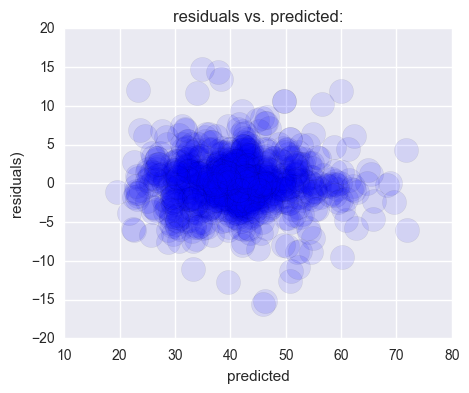

residuals appear to be normally distributed


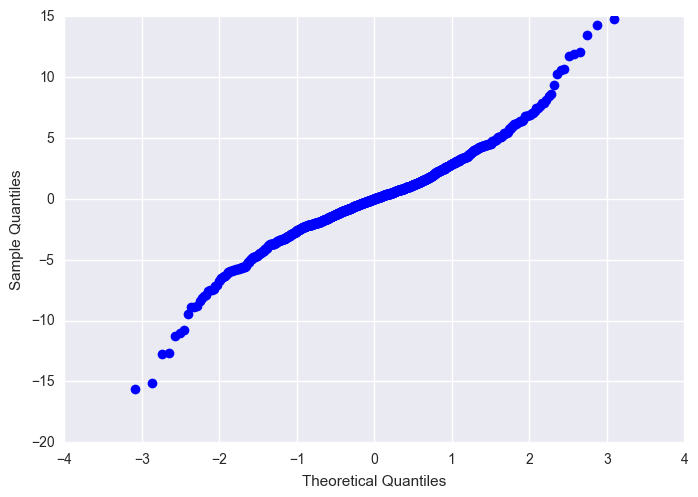

In [10]:
print("Applying OLS on train data and checking model assumptions")
X=train_factors
Y=train_class
regr = linear_model.LinearRegression()
regr.fit(X, Y)
r2=regr.score(train_factors,train_class)
print("train R^2: %.4f " % (r2))
res=Y-regr.predict(X)
y,x =res,regr.predict(X)
fig = plt.figure(figsize=(5, 4))
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
ax.scatter(x, y, c="blue",alpha=.1, s=300)
ax.set_title("residuals vs. predicted:")
ax.set_xlabel("predicted")
ax.set_ylabel("residuals)")
print("residuals appear to behave randomly, it suggests that the linear model fits the data well")
plt.show()
print("residuals appear to be normally distributed")
fig = sm.qqplot(res)
plt.show()

## Centering and Scaling nomeric features, and removing features with: $STD\approx0$ 

In [11]:
train_factors = pd.DataFrame(sp.StandardScaler().fit_transform(train_factors),columns = train_factors.columns)
test_factors = pd.DataFrame(sp.StandardScaler().fit_transform(test_factors),columns = test_factors.columns)
train_factors.head(5)

year  Enrolment in primary education, both sexes (number)  \
0  0.780879                                          -0.287638     
1 -0.782461                                          -0.286277     
2 -0.782461                                          -0.239970     
3 -0.000791                                          -0.048709     
4  0.780879                                          -0.291860     

   Enrolment in primary education, female (number)  \
0                                        -0.296172   
1                                        -0.295247   
2                                        -0.246859   
3                                        -0.045464   
4                                        -0.304565   

   GDP at market prices (constant 2005 US$)  \
0                                 -0.514255   
1                                 -0.471274   
2                                 -0.377320   
3                                  0.195653   
4                                 -0.521043   

   GDP at market prices (current US$)  GDP per capita (constant 2005 US$)  \
0                           -0.378689                           -1.064374   
1                           -0.367663                           -0.355682   
2                           -0.343932                           -0.346354   
3                            0.124527                           -0.095502   
4                           -0.385495                           -1.302503   

   GDP per capita (current US$)  GNI (current US$)  \
0                     -0.728401          -0.374095   
1                     -0.598975          -0.364349   
2                     -0.678625          -0.339231   
3                     -0.000298           0.118704   
4                     -0.990904          -0.380670   

   GNI per capita, Atlas method (current US$)  \
0                                   -0.745905   
1                                   -0.637493   
2                                   -0.673391   
3                                   -0.056662   
4                                   -1.021603   

   Gross enrolment ratio, primary, both sexes (%)        ...         \
0                                        0.612859        ...          
1                                       -0.809469        ...          
2                                        0.369583        ...          
3                                        0.293365        ...          
4                                       -3.745178        ...          

   country_Ukraine  country_United Arab Emirates  country_United Kingdom  \
0        -0.063758                     -0.045038               -0.176961   
1        -0.063758                     -0.045038               -0.176961   
2        -0.063758                     -0.045038               -0.176961   
3        -0.063758                     -0.045038               -0.176961   
4        -0.063758                     -0.045038               -0.176961   

   country_United States  country_Uruguay  country_Uzbekistan  \
0              -0.055188        -0.055188           -0.045038   
1              -0.055188        -0.055188           -0.045038   
2              -0.055188        -0.055188           -0.045038   
3              -0.055188        -0.055188           -0.045038   
4              -0.055188        -0.055188           -0.045038   

   country_Vanuatu  country_Vietnam  country_Zambia  country_Zimbabwe  
0         -0.03183        -0.063758        -0.03183         -0.055188  
1         -0.03183        -0.063758        -0.03183         -0.055188  
2         -0.03183        -0.063758        -0.03183         -0.055188  
3         -0.03183        -0.063758        -0.03183         -0.055188  
4         -0.03183        -0.063758        -0.03183         -0.055188  

[5 rows x 222 columns]

## Outliers Detection

Stage 0
validation R^2, 0.9128 


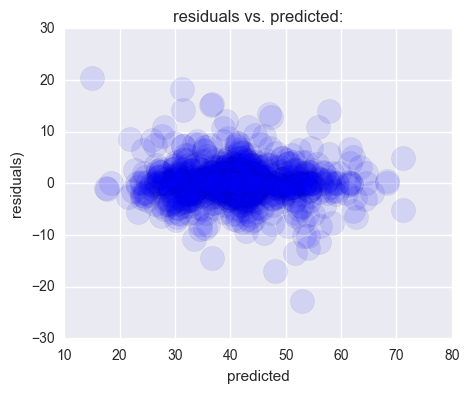

44 rows were dropped
After final stage
validation R^2, 0.9543 


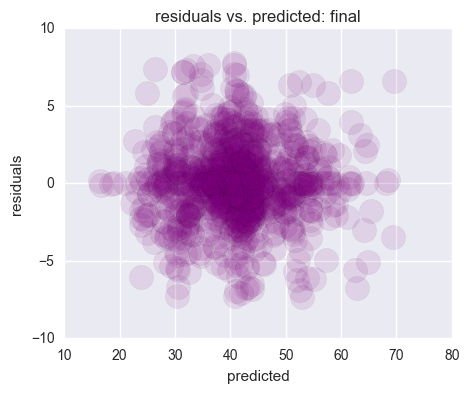

In [12]:
OutliersDetection.remove_outliers_rlm(train_factors, train_class, 1)

## Apply PCA for data visualizaion

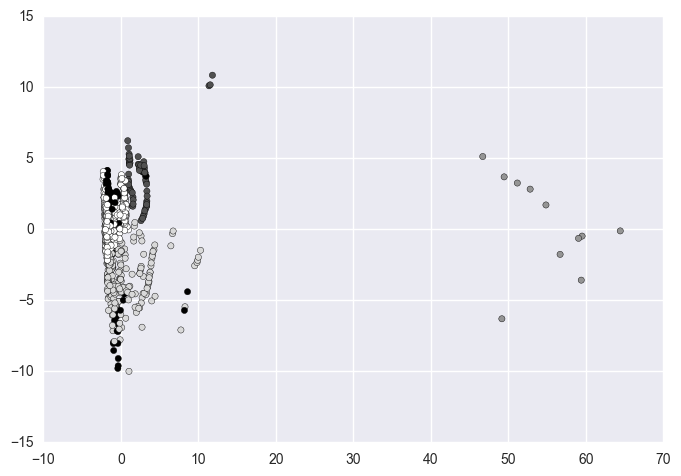

In [13]:
plot_columns, labels = DataVisualizations.twoDimPCAandClustering(train_factors)

## Print outliers countries

In [14]:
outliers_indecies = np.where(plot_columns[:,0]>30)[0].tolist()
outliers_df = train_data.loc[outliers_indecies, :]
outliers_df['country'].head(min(10, len(outliers_indecies)))

18     India
269    China
272    India
314    China
363    India
448    China
454    India
473    China
661    China
761    China
Name: country, dtype: object

### Remove outliers if reducing aquracy

In [15]:
training_data_with_outliers = train_factors.copy()
training_class_with_outliers = train_class.copy()

f = FloatProgress(min=0, max=100)
display(f)

enet = ElasticNetCV(max_iter=5000, cv=10, n_jobs=-1)
enet.fit(training_data_with_outliers, training_class_with_outliers)
train_r_squared_with_outliers = enet.score\
(training_data_with_outliers, training_class_with_outliers)
f.value += 45

training_data_without_outliers = train_factors.drop(outliers_indecies, inplace=False)
training_class_without_outliers = train_class.drop(outliers_indecies, inplace=False)

enet.fit(training_data_without_outliers, training_class_without_outliers)
train_r_squared_without_outliers = enet.score\
(training_data_without_outliers, training_class_without_outliers)

f.value += 45

print('R^2 on validation set with outliers:', train_r_squared_with_outliers,\
          ', and without outliers:', train_r_squared_without_outliers)
if (train_r_squared_without_outliers < train_r_squared_with_outliers):
    print('Removing outliers from training set.')
    train_factors = train_factors.drop(train_factors.index[outliers])
    train_class = train_class.drop(train_class.index[outliers])
    train_data = train_data.drop(train_data.index[outliers])
    print('2D PCA after removal:')
    plot_columns, labels = DataVisualizations.twoDimPCAandClustering(train_factors)
else:
    print('Leaving outliers in the training set.')
f.value += 10

R^2 on validation set with outliers: 0.842382368848 , and without outliers: 0.842683994102
Leaving outliers in the training set.


## Feature selection with E.Net model

In [16]:
# run elastic model for feature selection 
enet = ElasticNetCV(max_iter=5000, cv=5, n_jobs=-1)
enet.fit(train_factors, train_class)

sfm = fs.SelectFromModel(enet, prefit=True)
chosen_features_and_coefs = [(train_factors.columns[i],enet.coef_[i]) for i in sfm.get_support(True)]

chosen_features_and_coefs.sort(key=lambda x:abs(x[1]), reverse=True)
headers = [['correlated feature', 'linear correlation rate to target']]
data = headers + [[x[0], x[1]]\
                  for x in chosen_features_and_coefs]
headers = data.pop(0) # gives the headers as list and leaves data
table = pd.DataFrame(data, columns=headers)
print("Enet Strong factors are: ")
table.head(10)

Enet Strong factors are: 


correlated feature  linear correlation rate to target
0       country_Mexico                           2.017598
1   country_Luxembourg                          -1.938077
2  country_Switzerland                           1.474377
3      country_Vietnam                           1.306029
4       country_Norway                          -1.260898
5   country_Costa Rica                           1.202434
6    country_Guatemala                           1.154075
7       country_Sweden                           1.130088
8  country_New Zealand                          -1.112330
9  country_Netherlands                           1.099715

## Compute statistics on training set for Enet prediction

In [17]:
train_r_squared = enet.score(train_factors, train_class)
train_predictions = enet.predict(train_factors)

# Compute the error.test_mse = mean_squared_error(y_test, rf.predict(test_factors))
train_rmse = np.sqrt(mean_squared_error(train_class, train_predictions))
print("train R^2, %.4f, train RMSE, %.4f" % (train_r_squared, train_rmse))

train R^2, 0.8365, train RMSE, 3.6004


## Countries corrolated to target plot

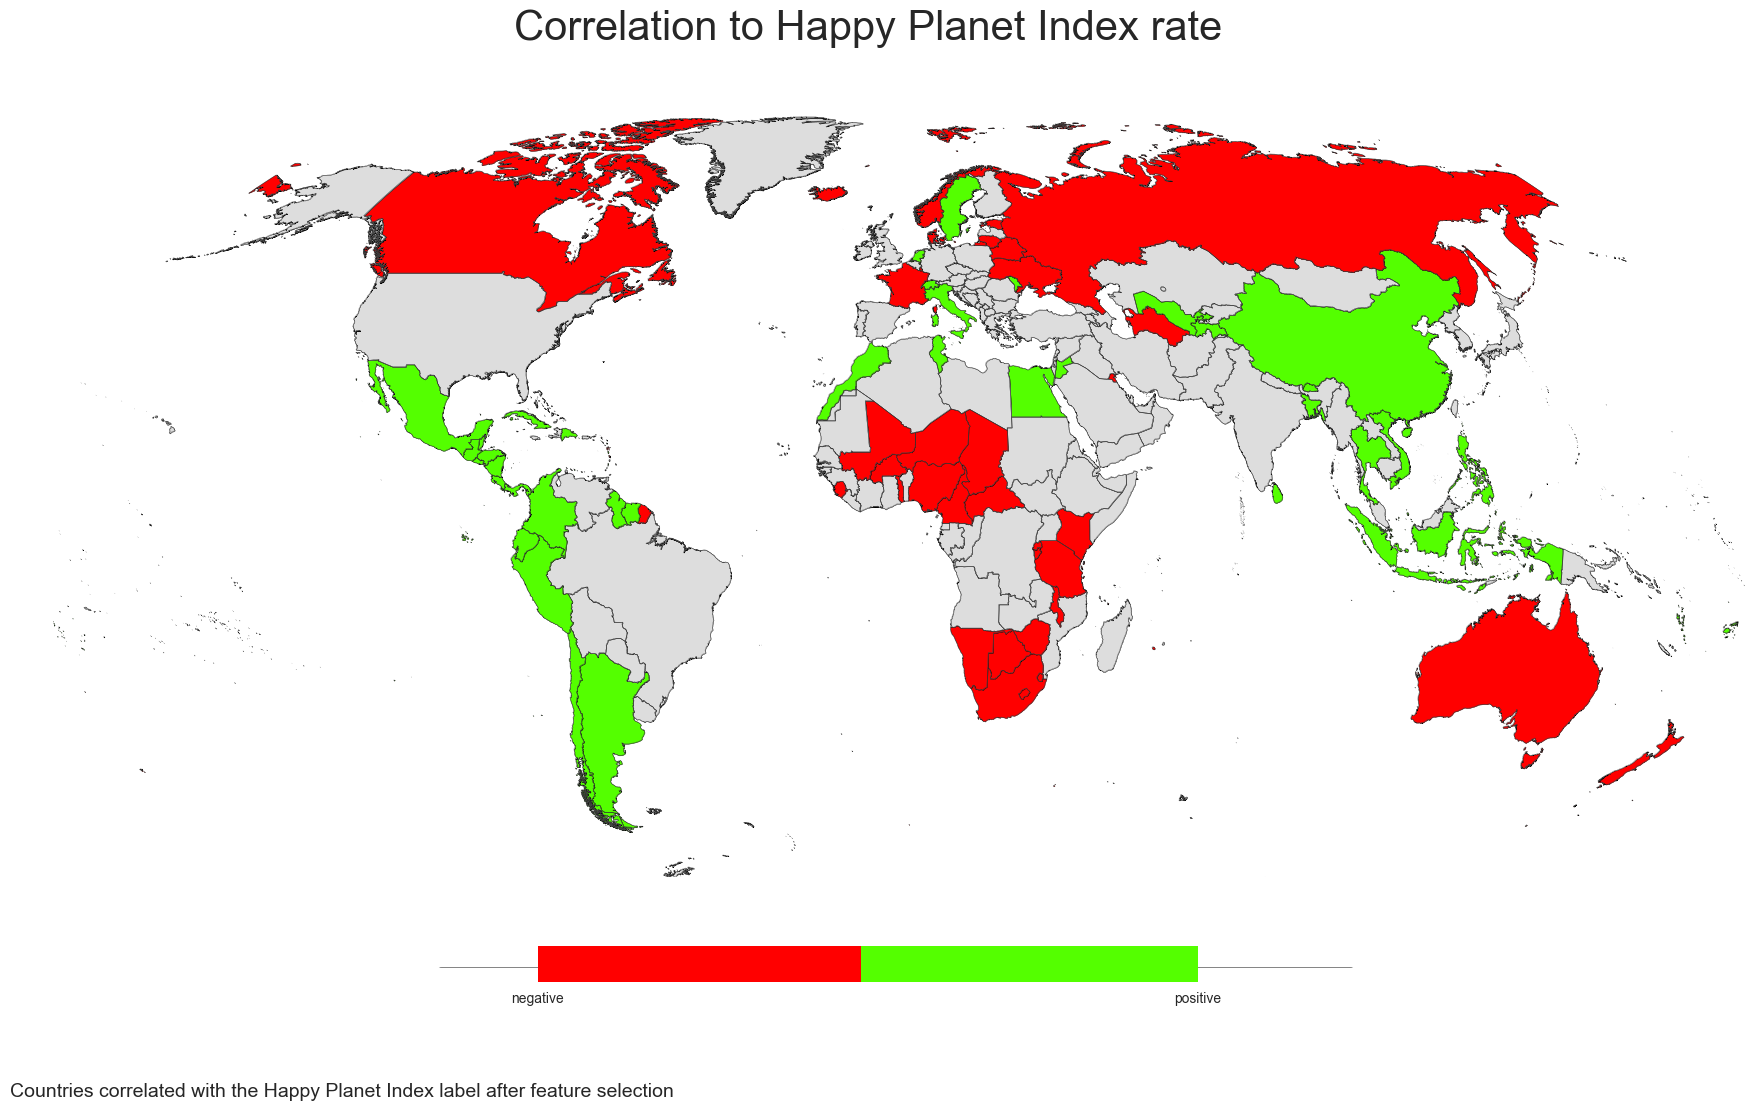

In [23]:
headers = [['country', 'Correlation to Happy Planet Index']]
data = headers + [[x[0].split('country_')[1], np.sign(x[1])]\
                  for x in chosen_features_and_coefs if x[0].startswith('country_')]
headers = data.pop(0) # gives the headers as list and leaves data
df = pd.DataFrame(data, columns=headers)
MapVisualizations.plotDataOnMap(df, year='mean', feature="Correlation to Happy Planet Index", binary=True,\
              descripton='Countries correlated with the Happy Planet Index label after feature selection')

### Take remaining features

In [18]:
chosen_features = [x[0] for x in chosen_features_and_coefs]
train_factors = train_factors[chosen_features]
test_factors = test_factors[chosen_features]
train_factors.head(5)

country_Mexico  country_Luxembourg  country_Switzerland  country_Vietnam  \
0       -0.176961           -0.170783            -0.170783        -0.063758   
1       -0.176961           -0.170783            -0.170783        -0.063758   
2       -0.176961           -0.170783            -0.170783        -0.063758   
3       -0.176961           -0.170783            -0.170783        -0.063758   
4       -0.176961           -0.170783            -0.170783        -0.063758   

   country_Norway  country_Costa Rica  country_Guatemala  country_Sweden  \
0       -0.176961           -0.045038          -0.055188       -0.167618   
1       -0.176961           -0.045038          -0.055188       -0.167618   
2       -0.176961           -0.045038          -0.055188       -0.167618   
3       -0.176961           -0.045038          -0.055188       -0.167618   
4       -0.176961           -0.045038          -0.055188       -0.167618   

   country_New Zealand  country_Netherlands          ...           \
0            -0.170783             -0.17998          ...            
1            -0.170783             -0.17998          ...            
2            -0.170783             -0.17998          ...            
3            -0.170783             -0.17998          ...            
4            -0.170783             -0.17998          ...            

   country_Fiji  country_Italy  country_Namibia  country_Kenya  \
0      -0.03183      -0.176961        22.203603      -0.055188   
1      -0.03183      -0.176961        -0.045038      -0.055188   
2      -0.03183      -0.176961        -0.045038      -0.055188   
3      -0.03183      -0.176961        -0.045038      -0.055188   
4      -0.03183      -0.176961        -0.045038      -0.055188   

   country_Malawi  country_Moldova  country_Rwanda  country_Niger  \
0       -0.055188        -0.071319        -0.03183      -0.055188   
1       -0.055188        -0.071319        -0.03183      -0.055188   
2       -0.055188        -0.071319        -0.03183      -0.055188   
3       -0.055188        -0.071319        -0.03183      -0.055188   
4       -0.055188        -0.071319        -0.03183      -0.055188   

   Gross enrolment ratio, primary, both sexes (%)  country_Burkina Faso  
0                                        0.612859             -0.045038  
1                                       -0.809469             -0.045038  
2                                        0.369583             -0.045038  
3                                        0.293365             -0.045038  
4                                       -3.745178             -0.045038  

[5 rows x 89 columns]

In [21]:
chosen_features = [x[0] for x in chosen_features_and_coefs if not x[0].startswith('country_')]

print(chosen_features)
len(chosen_features)

['year', 'Official entrance age to pre-primary education (years)', 'Official entrance age to primary education (years)', 'Mortality rate, under-5 (per 1,000)', 'GNI per capita, Atlas method (current US$)', 'Population growth (annual %)', 'GDP per capita (current US$)', 'Gross enrolment ratio, primary, male (%)', 'GDP per capita (constant 2005 US$)', 'Gross enrolment ratio, primary, both sexes (%)']


10

### Apply PCA after feature selection

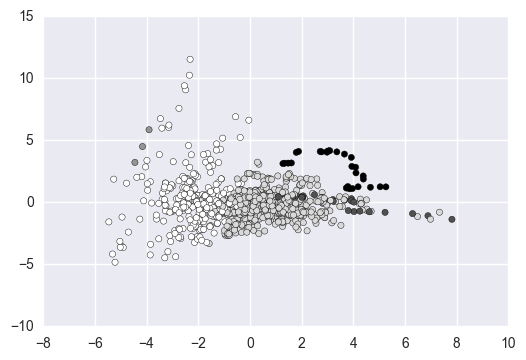

In [25]:
plot_columns, labels = DataVisualizations.twoDimPCAandClustering(train_factors)

## Features extraction

In [26]:
poly = sp.PolynomialFeatures(2, include_bias=False)
transf_train = poly.fit_transform(train_factors)
transf_test = poly.fit_transform(test_factors)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(train_factors.columns,p) for p in poly.powers_]]
train_factors_after_extracion = (pd.DataFrame(transf_train, columns = target_feature_names))
test_factors_after_extracion = (pd.DataFrame(transf_test, columns = target_feature_names))
train_factors_after_extracion.head(5)

country_Mexico^1  country_Luxembourg^1  country_Switzerland^1  \
0         -0.176961             -0.170783              -0.170783   
1         -0.176961             -0.170783              -0.170783   
2         -0.176961             -0.170783              -0.170783   
3         -0.176961             -0.170783              -0.170783   
4         -0.176961             -0.170783              -0.170783   

   country_Vietnam^1  country_Norway^1  country_Costa Rica^1  \
0          -0.063758         -0.176961             -0.045038   
1          -0.063758         -0.176961             -0.045038   
2          -0.063758         -0.176961             -0.045038   
3          -0.063758         -0.176961             -0.045038   
4          -0.063758         -0.176961             -0.045038   

   country_Guatemala^1  country_Sweden^1  country_New Zealand^1  \
0            -0.055188         -0.167618              -0.170783   
1            -0.055188         -0.167618              -0.170783   
2            -0.055188         -0.167618              -0.170783   
3            -0.055188         -0.167618              -0.170783   
4            -0.055188         -0.167618              -0.170783   

   country_Netherlands^1           ...            country_Rwanda^2  \
0               -0.17998           ...                    0.001013   
1               -0.17998           ...                    0.001013   
2               -0.17998           ...                    0.001013   
3               -0.17998           ...                    0.001013   
4               -0.17998           ...                    0.001013   

   country_Rwanda^1xcountry_Niger^1  \
0                          0.001757   
1                          0.001757   
2                          0.001757   
3                          0.001757   
4                          0.001757   

   country_Rwanda^1xGross enrolment ratio, primary, both sexes (%)^1  \
0                                          -0.019508                   
1                                           0.025766                   
2                                          -0.011764                   
3                                          -0.009338                   
4                                           0.119210                   

   country_Rwanda^1xcountry_Burkina Faso^1  country_Niger^2  \
0                                 0.001434         0.003046   
1                                 0.001434         0.003046   
2                                 0.001434         0.003046   
3                                 0.001434         0.003046   
4                                 0.001434         0.003046   

   country_Niger^1xGross enrolment ratio, primary, both sexes (%)^1  \
0                                          -0.033822                  
1                                           0.044673                  
2                                          -0.020396                  
3                                          -0.016190                  
4                                           0.206688                  

   country_Niger^1xcountry_Burkina Faso^1  \
0                                0.002486   
1                                0.002486   
2                                0.002486   
3                                0.002486   
4                                0.002486   

   Gross enrolment ratio, primary, both sexes (%)^2  \
0                                          0.375597   
1                                          0.655241   
2                                          0.136591   
3                                          0.086063   
4                                         14.026361   

   Gross enrolment ratio, primary, both sexes (%)^1xcountry_Burkina Faso^1  \
0                                          -0.027602                         
1                                           0.036457                         
2                                          -0.016645                       

## Corrolations between target and extracted features

In [27]:
poly = sp.PolynomialFeatures(2, include_bias=False)
transf_train = poly.fit_transform(train_factors)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(train_factors.columns,p) for p in poly.powers_]]
train_factors_after_extracion = (pd.DataFrame(transf_train, columns = target_feature_names))

max_corr_before = HPI_correlation['Correlation to Happy Planet Index'].iloc[0]
HPI_correlation_feature_extraction = train_factors_after_extracion[train_factors_after_extracion.columns[:]].apply\
(lambda x: x.corr(train_data['Happy Planet Index'], method='spearman'))
HPI_correlation_feature_extraction = HPI_correlation_feature_extraction.abs().sort_values(ascending=False)
HPI_correlation_feature_extraction = pd.DataFrame({'Feature':HPI_correlation_feature_extraction.index,\
                                'Correlation to Happy Planet Index':HPI_correlation_feature_extraction.values})
HPI_correlation_feature_extraction = HPI_correlation_feature_extraction.loc\
[(HPI_correlation_feature_extraction["Correlation to Happy Planet Index"] > max_corr_before) \
 & ((HPI_correlation_feature_extraction["Feature"].str.count("\^") == 2) | ((HPI_correlation_feature_extraction["Feature"].str.count("\^2") == 1)))]
print('There are', HPI_correlation_feature_extraction.shape[0],\
      'new features that are more corrolative to target then old features and many other new very correlative features')
HPI_correlation_feature_extraction.head(5)

There are 57 new features that are more corrolative to target then old features and many other new very correlative features


Correlation to Happy Planet Index                                   Feature
0                           0.307832    country_Luxembourg^1xcountry_Denmark^1
1                           0.298278  country_Luxembourg^1xcountry_Australia^1
2                           0.297136     country_Luxembourg^1xcountry_Norway^1
3                           0.293244    country_Mexico^1xcountry_Netherlands^1
4                           0.291506    country_Mexico^1xcountry_Switzerland^1

# Model

In [28]:
param_grid = {'alpha': [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12],\
              'gamma': [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]}
model = GridSearchCV(KernelRidge(kernel='polynomial', degree=2), cv=5, param_grid=param_grid, n_jobs=-1, verbose=1)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   57.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed: 20.0min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed: 27.1min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 36.1min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 39.0min finished


Fitting 5 folds for each of 169 candidates, totalling 845 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 845 out of 845 | elapsed:   22.5s finished


Linear Regression
R^2 for Train data = 0.792321365887
R^2 for Test data = 0.607657675413
Lasso
R^2 for Train data = 0.778794048504
R^2 for Test data = 0.605386025626
Ridge
R^2 for Train data = 0.792312909705
R^2 for Test data = 0.607903997315
Random Forest
R^2 for Train data = 0.956210198637
R^2 for Test data = 0.755155600202
Ridge Kernel
R^2 for Train data = 0.84765612415
R^2 for Test data = 0.642430167372
Linear Regression
KSTEST results, train: KstestResult(statistic=1.0, pvalue=0.0)
KSTEST results, test : KstestResult(statistic=1.0, pvalue=0.0)


C:\Users\Avi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


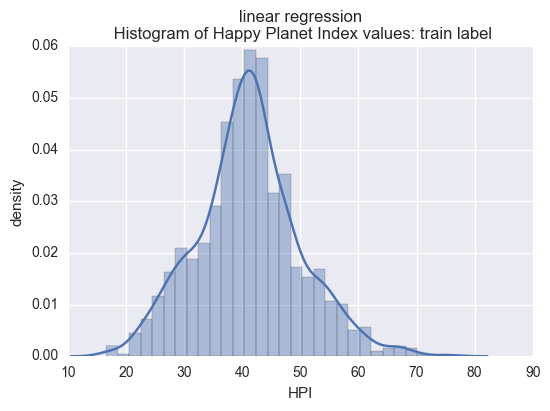

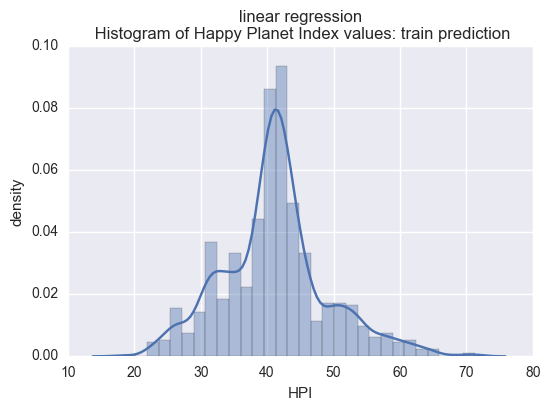

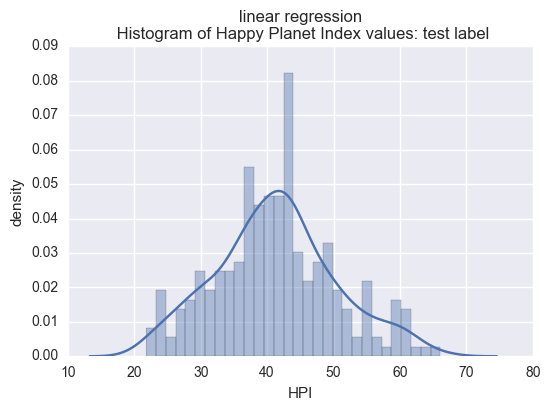

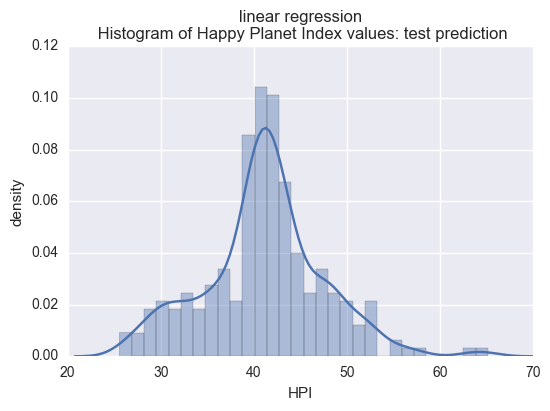

Lasso
KSTEST results, train: KstestResult(statistic=1.0, pvalue=0.0)
KSTEST results, test : KstestResult(statistic=1.0, pvalue=0.0)


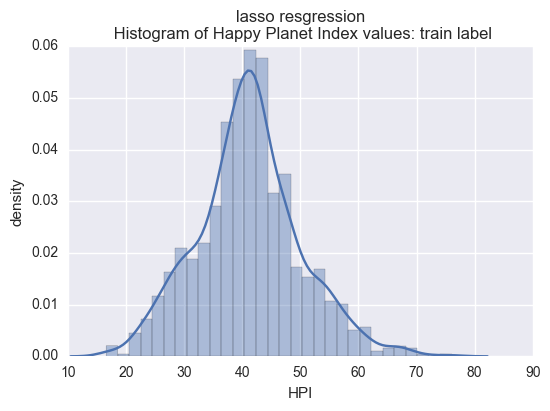

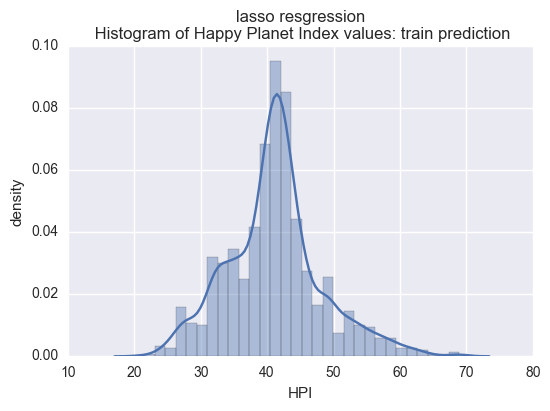

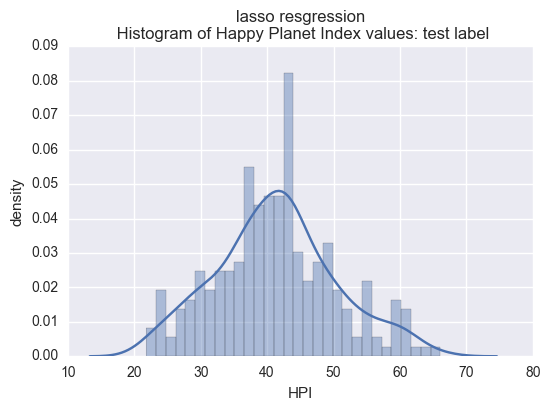

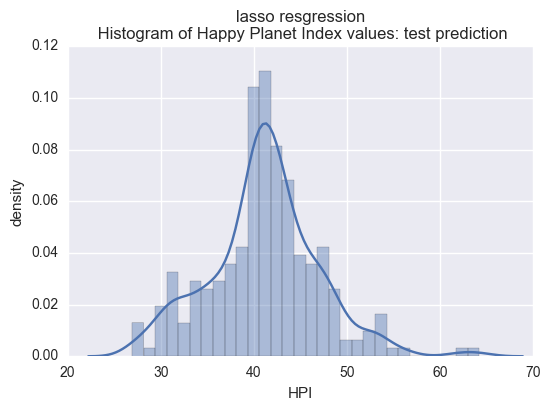

Ridge
KSTEST results, train: KstestResult(statistic=1.0, pvalue=0.0)
KSTEST results, test : KstestResult(statistic=1.0, pvalue=0.0)


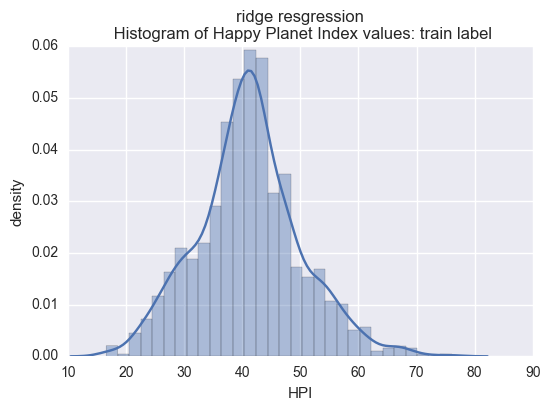

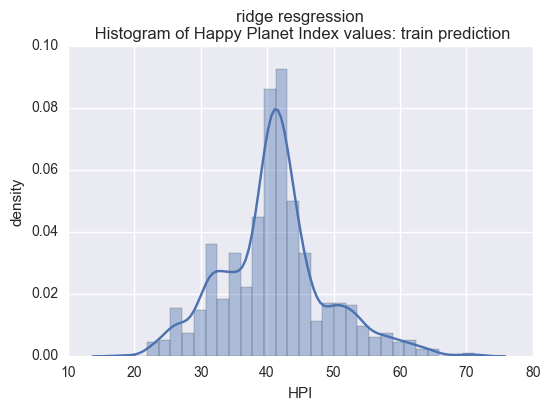

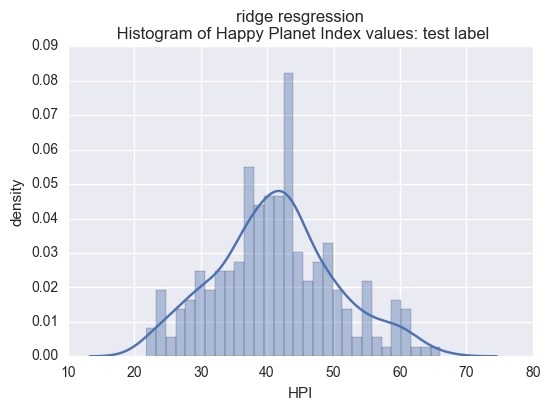

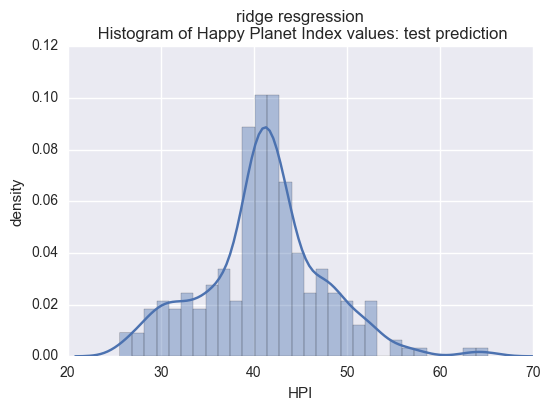

Random Forest
KSTEST results, train: KstestResult(statistic=1.0, pvalue=0.0)
KSTEST results, test : KstestResult(statistic=1.0, pvalue=0.0)


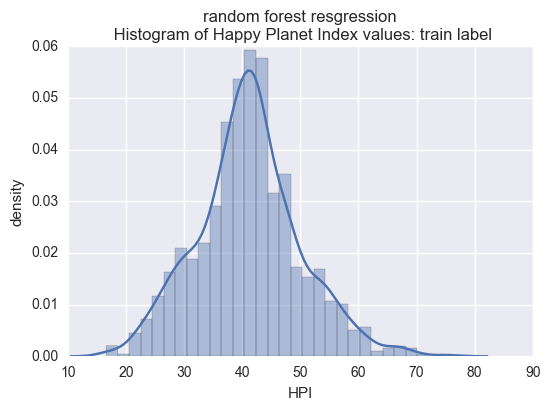

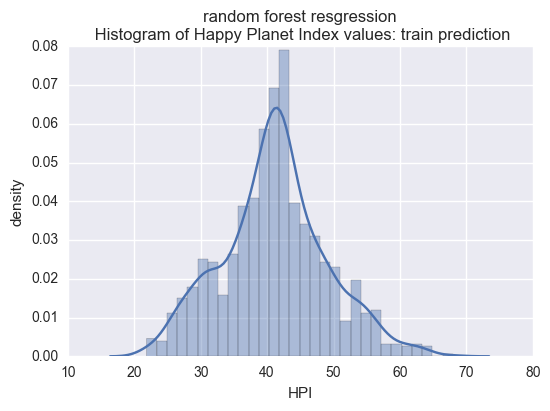

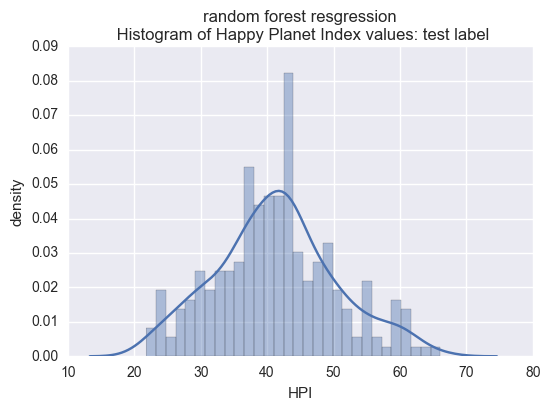

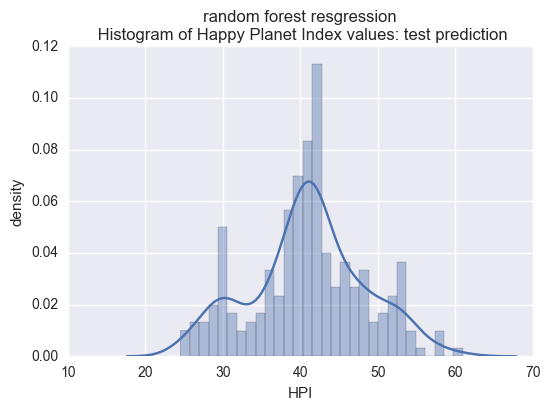

Ridge Kernel
KSTEST results, train: KstestResult(statistic=1.0, pvalue=0.0)
KSTEST results, test : KstestResult(statistic=1.0, pvalue=0.0)


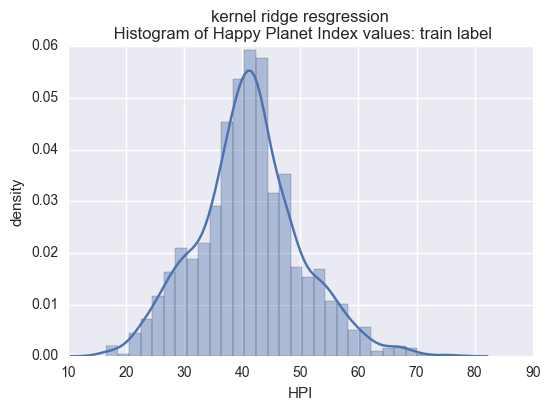

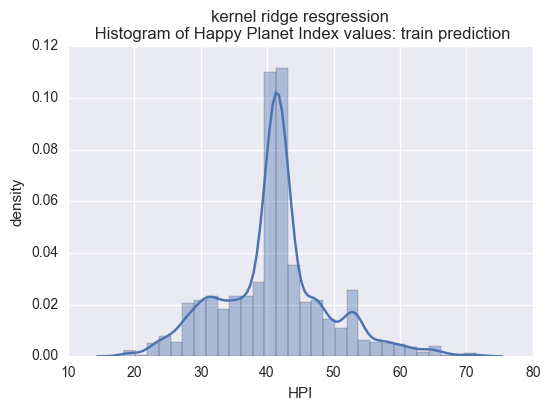

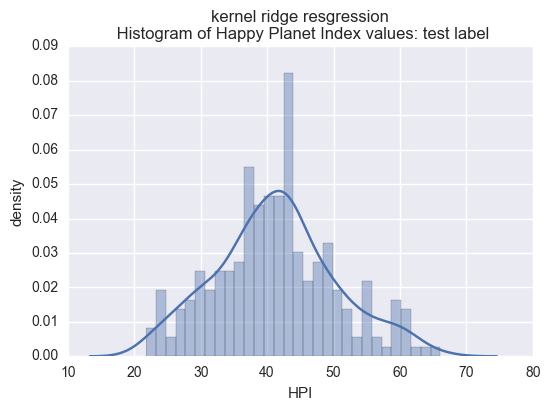

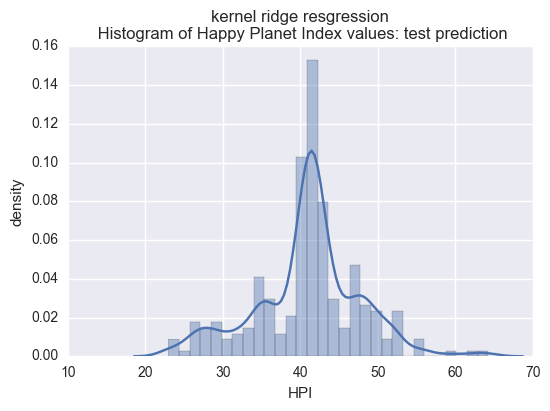

Linear Regression
The mean HPI of the train data: 41.13876518218629
The mean prediction of the train data: 41.13876518218626
The mean HPI of the test data : 41.364372469635626
The mean prediction of the test data : 41.13876518218624


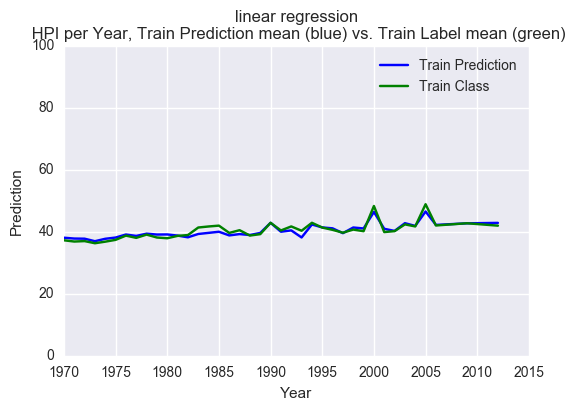

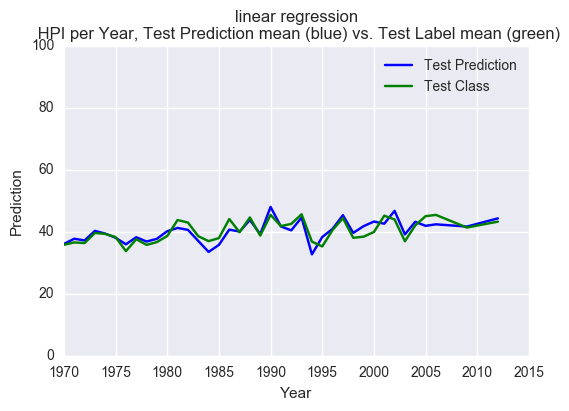

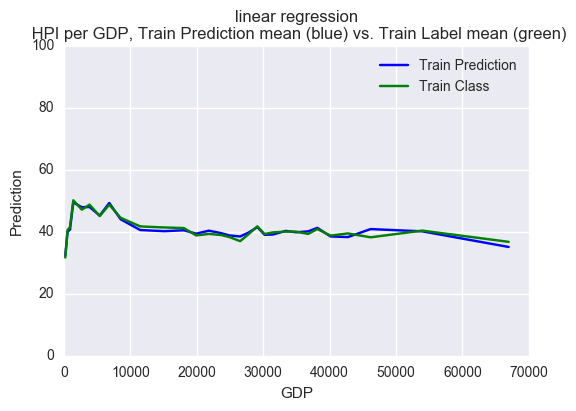

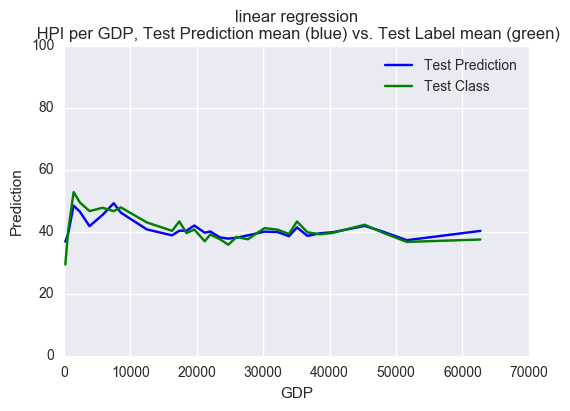

Lasso
The mean HPI of the train data: 41.13876518218629
The mean prediction of the train data: 41.13876518218627
The mean HPI of the test data : 41.364372469635626
The mean prediction of the test data : 41.13876518218623


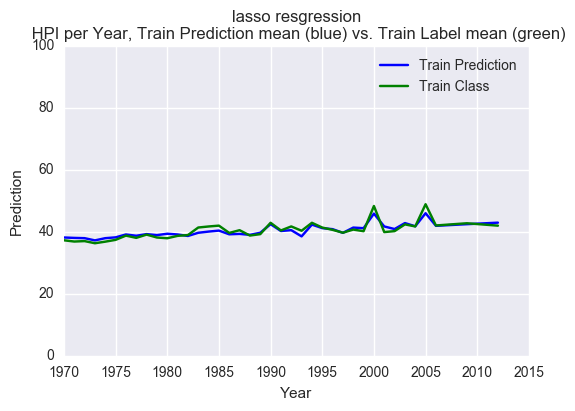

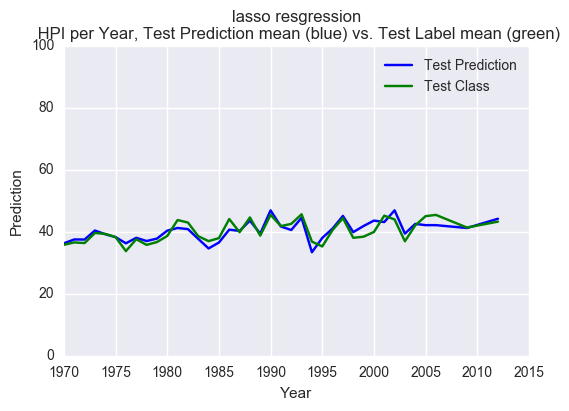

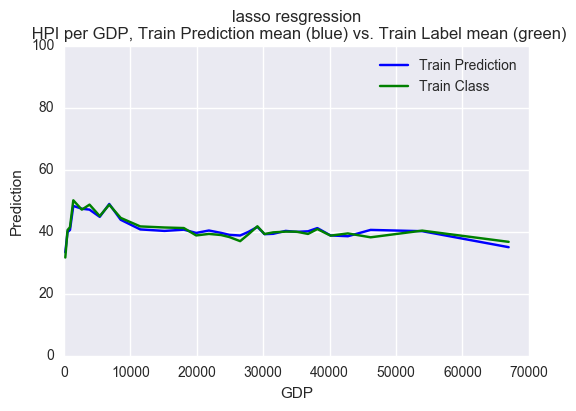

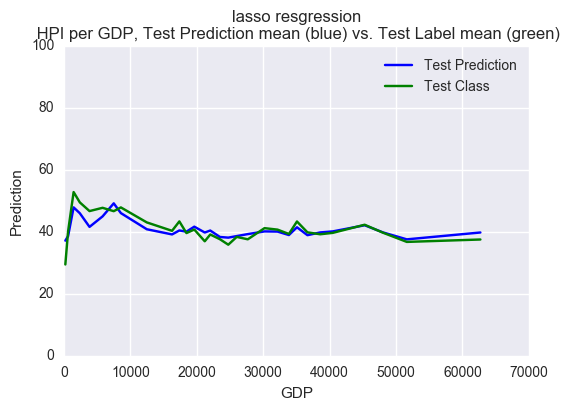

Ridge
The mean HPI of the train data: 41.13876518218629
The mean prediction of the train data: 41.13876518218624
The mean HPI of the test data : 41.364372469635626
The mean prediction of the test data : 41.13876518218624


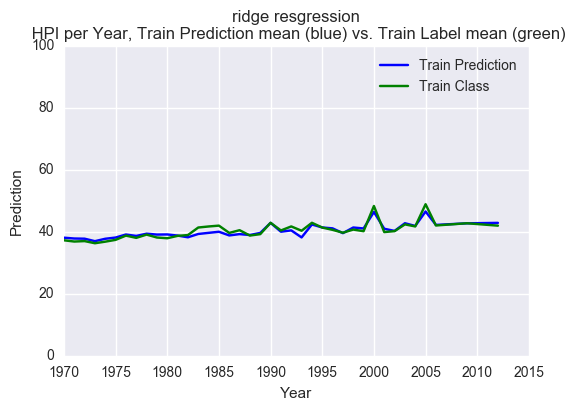

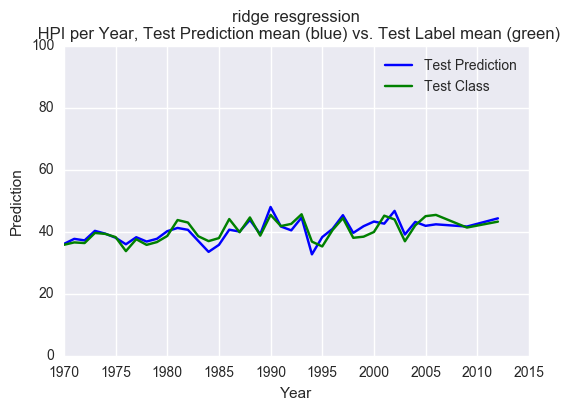

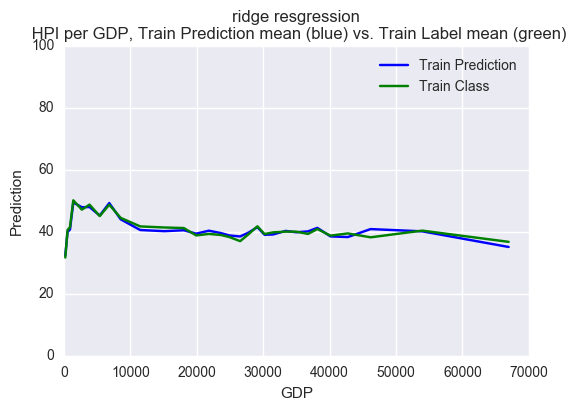

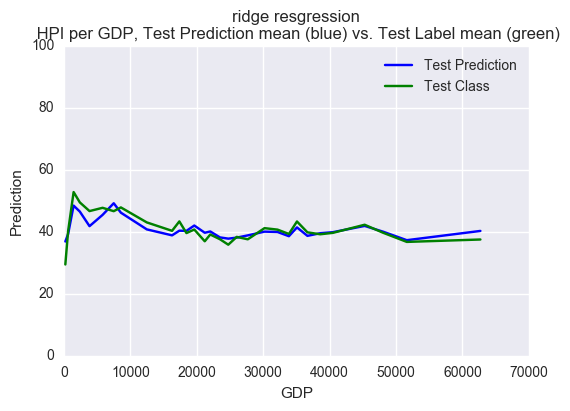

Random Forest
The mean HPI of the train data: 41.13876518218629
The mean prediction of the train data: 41.147968623481745
The mean HPI of the test data : 41.364372469635626
The mean prediction of the test data : 41.02322186234819


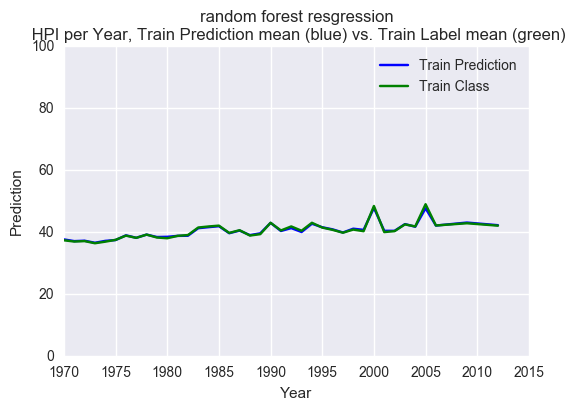

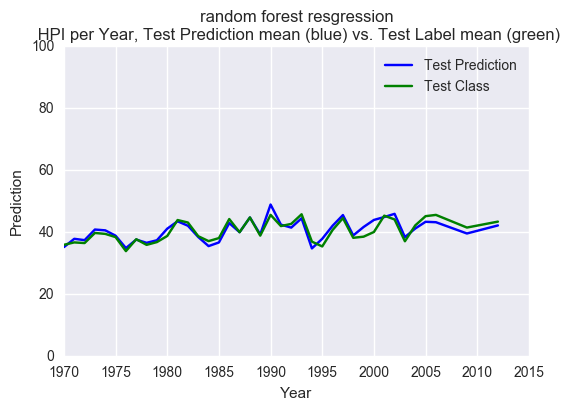

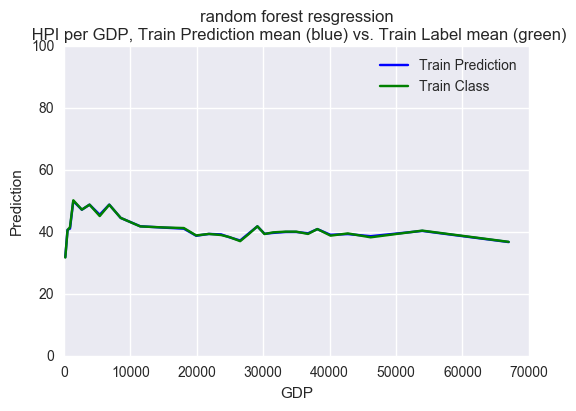

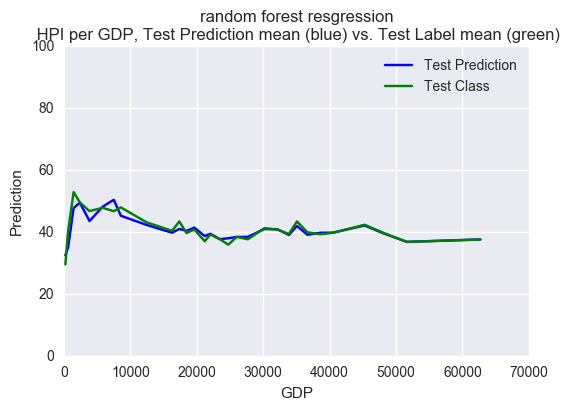

Ridge Kernel
The mean HPI of the train data: 41.13876518218629
The mean prediction of the train data: 41.13889777612107
The mean HPI of the test data : 41.364372469635626
The mean prediction of the test data : 41.01404173074946


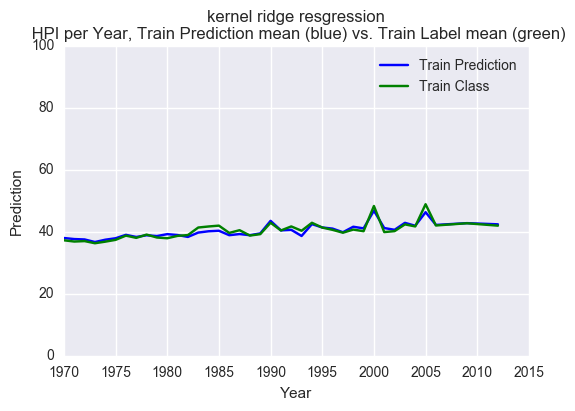

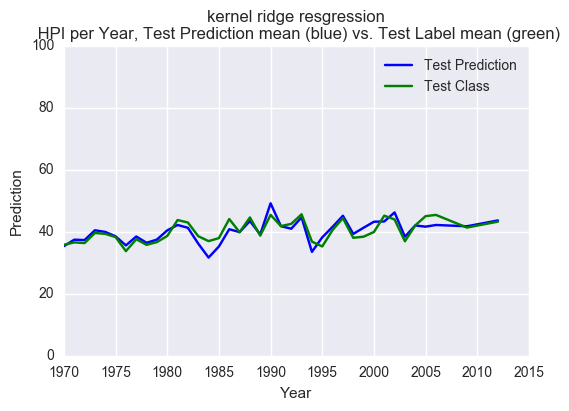

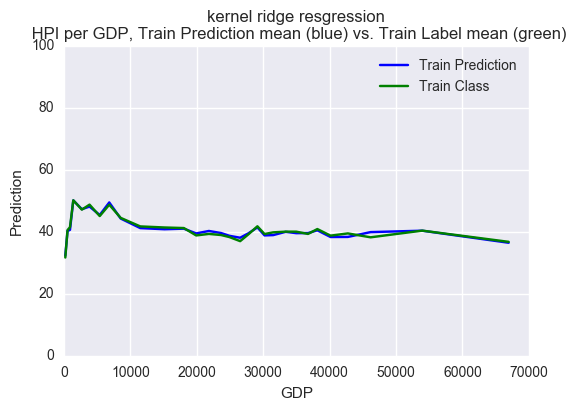

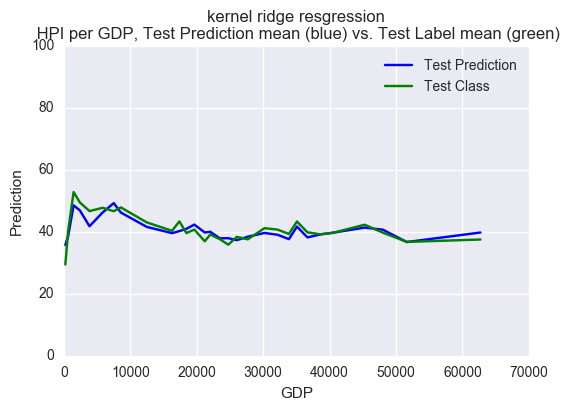

Linear Regression
Error Percentage for Train data = 7.484895131129594
Error Percentage for Test data = 9.792484843374558


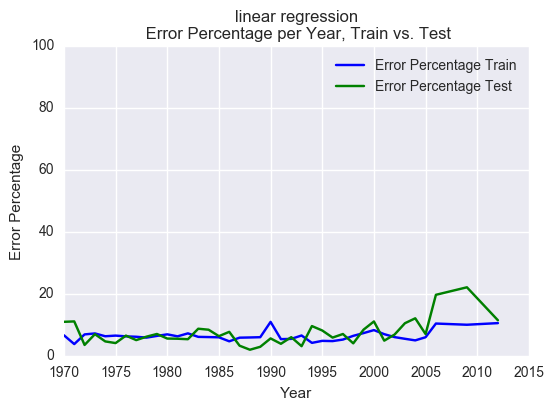

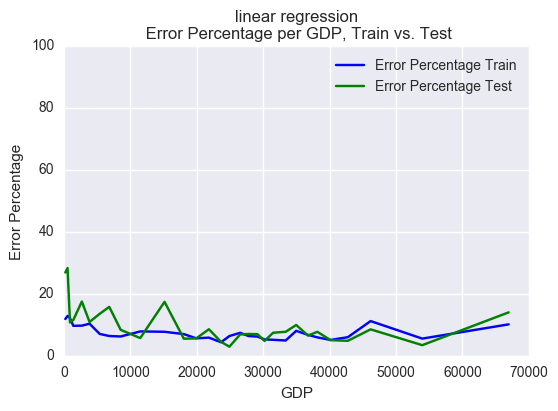

Lasso
Error Percentage for Train data = 7.756870020226051
Error Percentage for Test data = 9.911213678542232


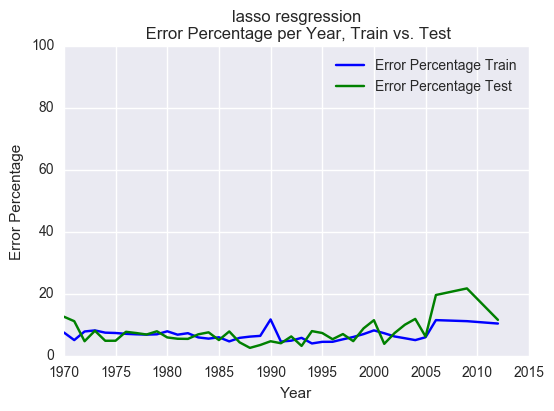

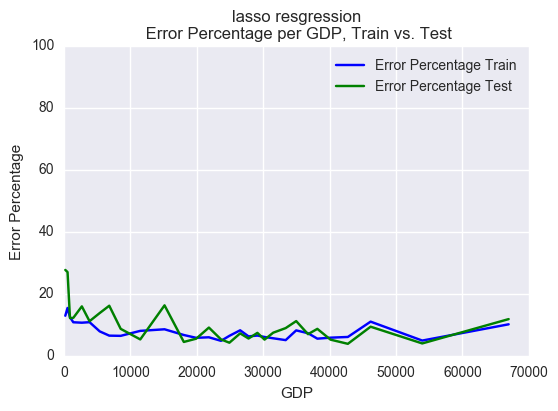

Ridge
Error Percentage for Train data = 7.483504322205857
Error Percentage for Test data = 9.786812946477735


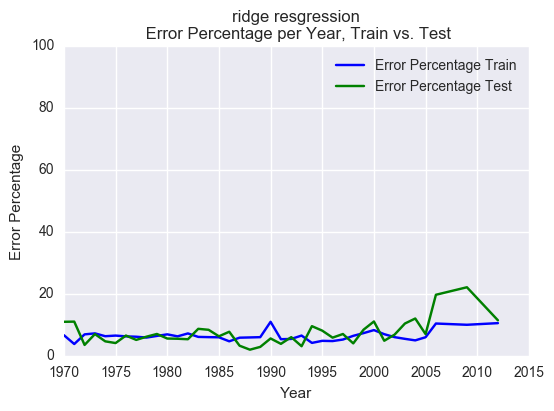

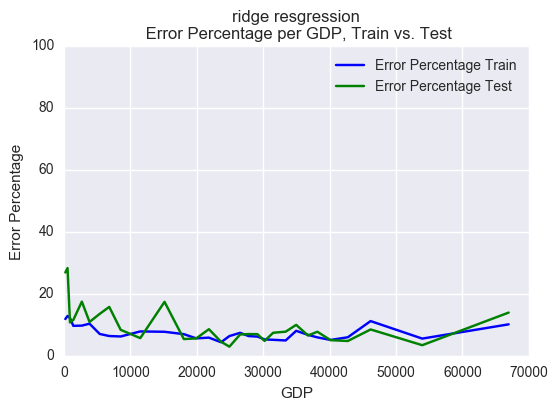

Random Forest
Error Percentage for Train data = 2.9183646235890017
Error Percentage for Test data = 7.364252197235165


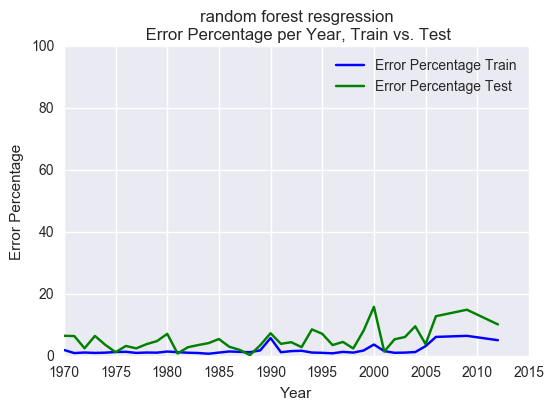

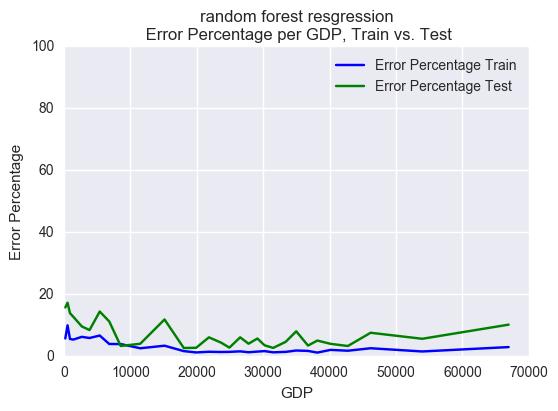

Ridge Kernel
Error Percentage for Train data = 6.07884592030069
Error Percentage for Test data = 9.520556040874354


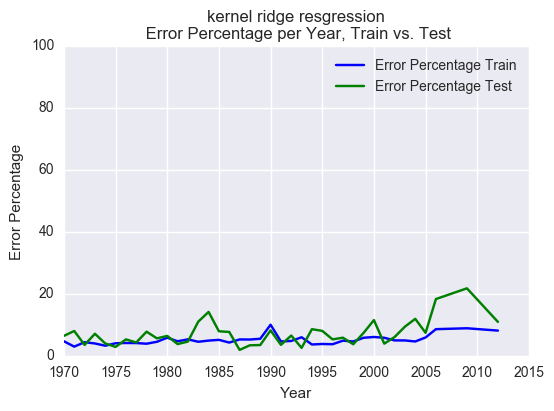

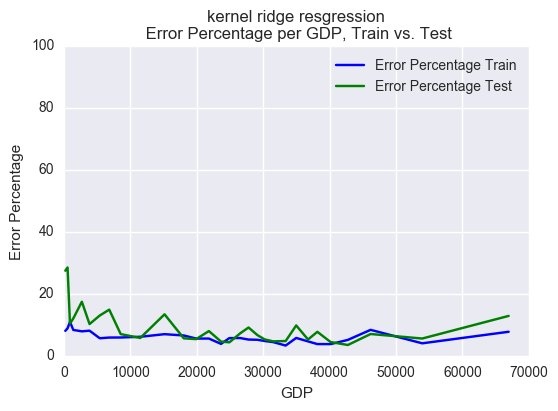

In [30]:
param_grid = {
    'n_estimators': [100, 200, 500, 700, 900],
    'max_features': ['auto', 'sqrt', 'log2']
}
tuned_parameters = {'max_features': [None, 'sqrt', 'log2'], 'n_estimators': [500, 1000, 1500], 'max_depth': [None, 1, 5, 10, 50], 'min_samples_split': [2, 3, 4, 5], 'min_samples_leaf':[1, 3, 5, 71,9]}

clf = GridSearchCV(RandomForestRegressor(), tuned_parameters, cv=5,
                  n_jobs=-1, verbose=1)
x_test = test_factors
y_test = test_class
x_train  = train_factors
y_train  = train_class

lr = LinearRegression()
linearRegResults = ResultsMeasurements(train_data,test_data,x_train,x_test,y_train,y_test,lr , 'linear regression')
lasso = linear_model.Lasso(alpha=0.1)
lassoResults = ResultsMeasurements(train_data,test_data,x_train,x_test,y_train,y_test,lasso, 'lasso resgression')
ridge = Ridge(alpha=1.0)
ridgeResults = ResultsMeasurements(train_data,test_data,x_train,x_test,y_train,y_test,ridge,'ridge resgression')
randomForestResults = ResultsMeasurements(train_data,test_data,x_train,x_test,y_train,y_test,clf,'random forest resgression')
ridgeKernelResults = ResultsMeasurements(train_data,test_data,x_train,x_test,y_train,y_test,model,'kernel ridge resgression')

print("Linear Regression")
linearRegResults.RSquaredResults()
print("Lasso")
lassoResults.RSquaredResults()
print("Ridge")
ridgeResults.RSquaredResults()
print("Random Forest")
randomForestResults.RSquaredResults()
print("Ridge Kernel")
ridgeKernelResults.RSquaredResults()

print("Linear Regression")
linearRegResults.DistributionResults()
print("Lasso")
lassoResults.DistributionResults()
print("Ridge")
ridgeResults.DistributionResults()
print("Random Forest")
randomForestResults.DistributionResults()
print("Ridge Kernel")
ridgeKernelResults.DistributionResults()

print("Linear Regression")
linearRegResults.MeanPredictionResults()
print("Lasso")
lassoResults.MeanPredictionResults()
print("Ridge")
ridgeResults.MeanPredictionResults()
print("Random Forest")
randomForestResults.MeanPredictionResults()
print("Ridge Kernel")
ridgeKernelResults.MeanPredictionResults()

print("Linear Regression")
linearRegResults.ErrorPercentageResults()
print("Lasso")
lassoResults.ErrorPercentageResults()
print("Ridge")
ridgeResults.ErrorPercentageResults()
print("Random Forest")
randomForestResults.ErrorPercentageResults()
print("Ridge Kernel")
ridgeKernelResults.ErrorPercentageResults()

In [33]:
import _pickle as cPickle
with open('Random_Forest.pkl', 'wb') as fid:
    cPickle.dump(clf, fid)

## Compute statistics on training set for Enet prediction

## HPI of test by countries

In [31]:
MapVisualizations.plotDataOnMap(data_to_plot, feature='class', year='mean')

NameError: name 'data_to_plot' is not defined

## Predicted HPI of test by countries

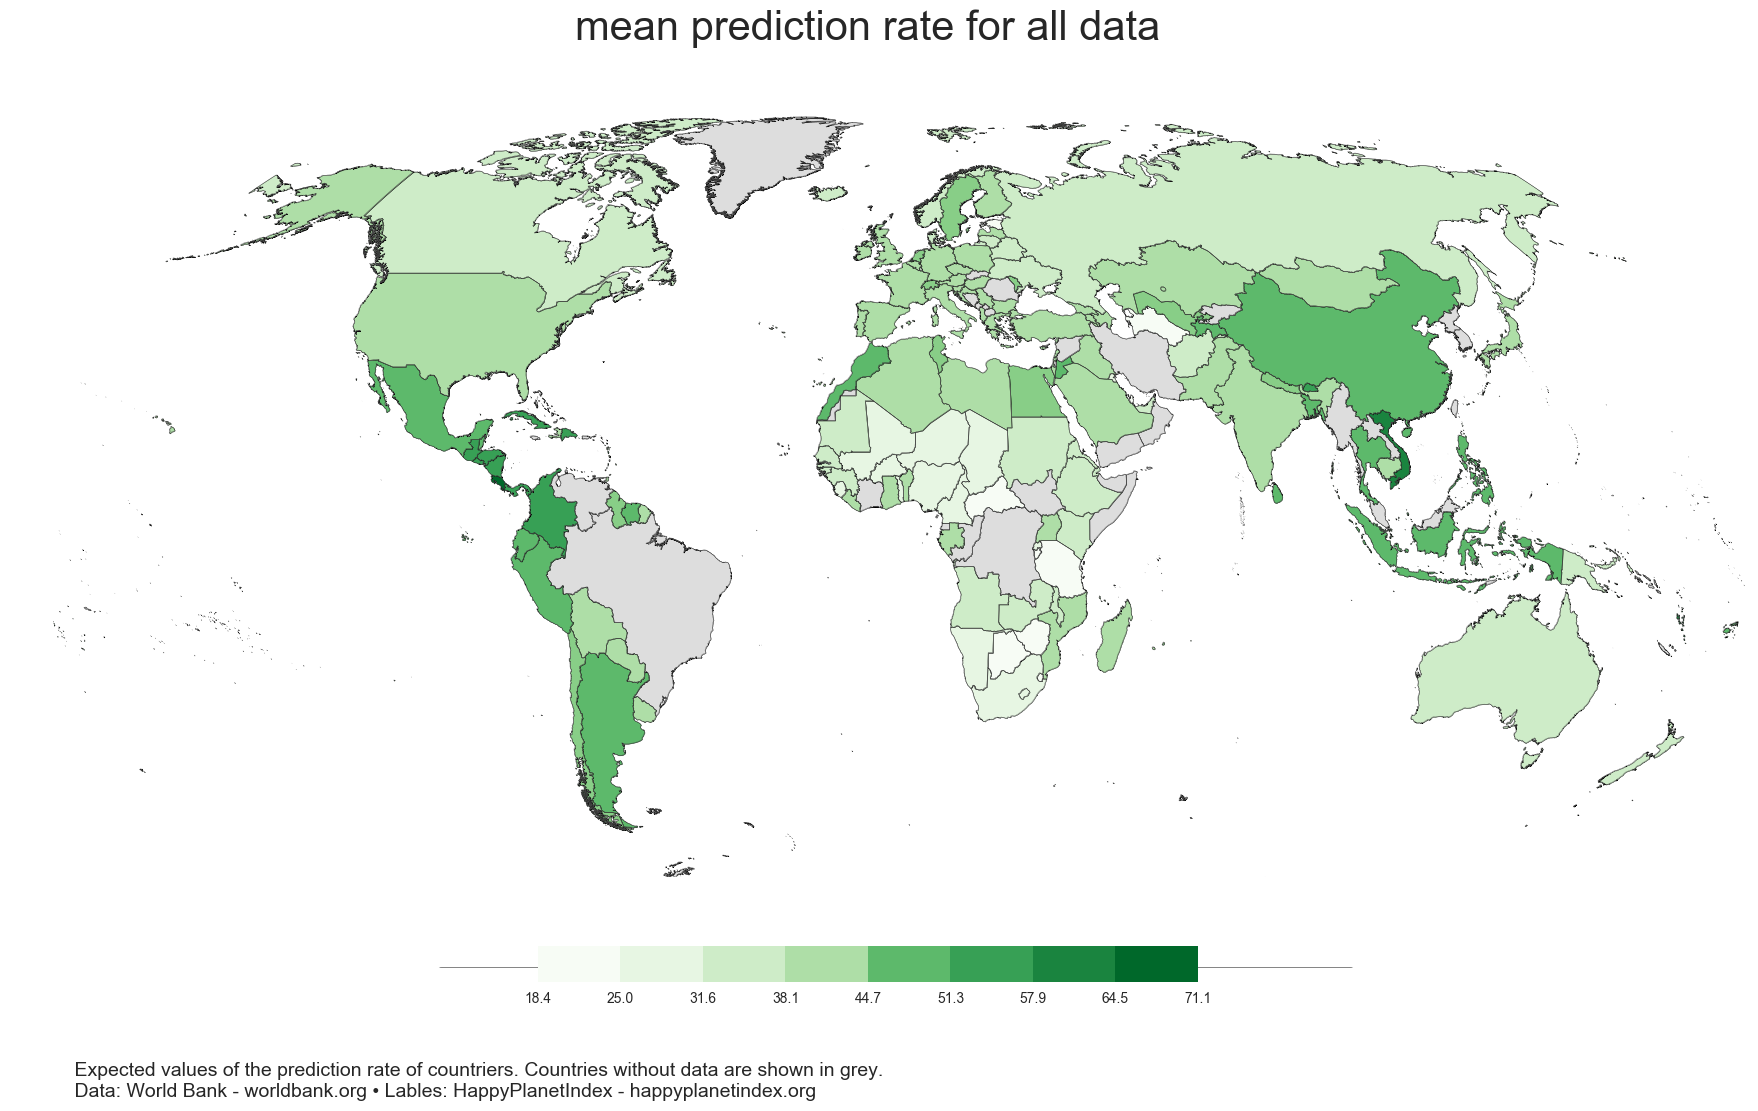

In [119]:
MapVisualizations.plotDataOnMap(data_to_plot, feature='prediction', year='mean')

## Countries that the rediction missed

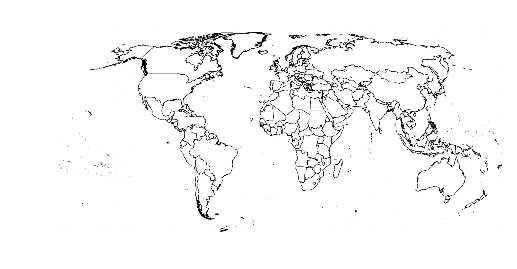

In [120]:
predicted_image = os.path.join(globe_plots, 'prediction_mean.png')
actual_image = os.path.join(globe_plots, 'class_mean.png')
output_image = os.path.join(uncorrolated_plots, 'prediction-class.png')
MapVisualizations.plotUncorrolatedCountries(predicted_image, actual_image, output_image)

## Removing years which are outliers

In [144]:
train_factors = train_factors.loc[(train_data['year'] != 1990) & (train_data['year'] != 2000)]
train_class = train_class.loc[(train_data['year'] != 1990) & (train_data['year'] != 2000)]
train_data = train_data.loc[(train_data['year'] != 1990) & (train_data['year'] != 2000)]
train_factors.head(5)

country_Mexico  country_Luxembourg  country_Switzerland  country_Vietnam  \
0       -0.176961           -0.170783            -0.170783        -0.063758   
1       -0.176961           -0.170783            -0.170783        -0.063758   
2       -0.176961           -0.170783            -0.170783        -0.063758   
3       -0.176961           -0.170783            -0.170783        -0.063758   
4       -0.176961           -0.170783            -0.170783        -0.063758   

   country_Norway  country_Costa Rica  country_Guatemala  country_Sweden  \
0       -0.176961           -0.045038          -0.055188       -0.167618   
1       -0.176961           -0.045038          -0.055188       -0.167618   
2       -0.176961           -0.045038          -0.055188       -0.167618   
3       -0.176961           -0.045038          -0.055188       -0.167618   
4       -0.176961           -0.045038          -0.055188       -0.167618   

   country_New Zealand  country_Netherlands          ...           \
0            -0.170783             -0.17998          ...            
1            -0.170783             -0.17998          ...            
2            -0.170783             -0.17998          ...            
3            -0.170783             -0.17998          ...            
4            -0.170783             -0.17998          ...            

   country_Fiji  country_Italy  country_Namibia  country_Kenya  \
0      -0.03183      -0.176961        22.203603      -0.055188   
1      -0.03183      -0.176961        -0.045038      -0.055188   
2      -0.03183      -0.176961        -0.045038      -0.055188   
3      -0.03183      -0.176961        -0.045038      -0.055188   
4      -0.03183      -0.176961        -0.045038      -0.055188   

   country_Malawi  country_Moldova  country_Rwanda  country_Niger  \
0       -0.055188        -0.071319        -0.03183      -0.055188   
1       -0.055188        -0.071319        -0.03183      -0.055188   
2       -0.055188        -0.071319        -0.03183      -0.055188   
3       -0.055188        -0.071319        -0.03183      -0.055188   
4       -0.055188        -0.071319        -0.03183      -0.055188   

   Gross enrolment ratio, primary, both sexes (%)  country_Burkina Faso  
0                                        0.612859             -0.045038  
1                                       -0.809469             -0.045038  
2                                        0.369583             -0.045038  
3                                        0.293365             -0.045038  
4                                       -3.745178             -0.045038  

[5 rows x 89 columns]

## More iteration of kernel ridge model

In [145]:
from sklearn.kernel_ridge import KernelRidge

#tuned_parameters = {'alpha': [1, 0.1, 0.15, 0.155, 0.1555], 'degree': [1, 2, 3, 4, 5], 'gamma': [1,0.1,0.01,0.001, 0.0001, None], 'kernel': ['polynomial']}
#model = KernelRidge(alpha=0.007, degree=2, kernel='polynomial',gamma=0.0022)
#model = KernelRidge(alpha=0.00007, degree=2, kernel='polynomial',gamma=0.000022)

param_grid = {'alpha': [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12],\
              'gamma': [1e0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12]}

def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

#alp = [x for x in frange(1e-4, 1e-2, 3e-4)]
#param_grid = {'alpha': alp,\
#              'gamma': alp}

#cross_v = train_factors.shape[0]
model = GridSearchCV(KernelRidge(kernel='polynomial', degree=2), cv=5, param_grid=param_grid, n_jobs=-1, verbose=1)
#model = KernelRidge(alpha=0.0004, degree=2, kernel='polynomial',gamma=0.0004)


model.fit(train_factors, train_class)
test_predictions = model.predict(test_factors)
train_predictions = model.predict(train_factors)

Fitting 5 folds for each of 169 candidates, totalling 845 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 845 out of 845 | elapsed:   21.0s finished


In [146]:
print(model.best_params_)

{'gamma': 1e-07, 'alpha': 1e-11}


In [124]:
test_predictions = model.predict(test_factors)
train_predictions = model.predict(train_factors)
# test_predictions = clf.predict(test_factors)
# train_predictions = clf.predict(train_factors)

# Compute the RMSE
train_mse = np.sqrt(mean_squared_error(train_class, train_predictions))
test_mse = np.sqrt(mean_squared_error(test_class, test_predictions))

# Compute R^2 values
train_r_squared = model.score(train_factors, train_class)
test_r_squared = model.score(test_factors, test_class)
# train_r_squared = clf.score(train_factors, train_class)
# test_r_squared = clf.score(test_factors, test_class)


print("train RMSE, %.4f, test RMSE: %.4f" % (train_mse, test_mse))
print("train R^2, %.4f, test R^2: %.4f" % (train_r_squared, test_r_squared))

train RMSE, 3.3525, test RMSE: 5.3159
train R^2, 0.8524, test R^2: 0.6509
